In [19]:
import pandas as pd
import numpy as np
import os

In [28]:
os.chdir = (r'\\10.0.7.226\ipba_group10')

In [29]:
os.getcwd()

'C:\\Users\\IPBAB047'

# Product Dataset - EDA

In [25]:
product = pd.read_csv(r'\\10.0.7.226\ipba_group10\product_dataset.csv')

In [30]:
product.head()

,DBSKU,DEPARTMENT,CLASS,SUBCLASS,DEPARTMENT_NAME,CLASS_NAME,SUBCLASS_NAME;;;;
0,2182204.0,12,3,32,Dept;1,Class;1,Sub;Class;1
1,2860882.0,12,3,31,Dept;1,Class;1,Sub;Class;2
2,2695858.0,12,5,50,Dept;1,Class;2,Sub;Class;3
3,675793.0,10,4,41,Dept;2,Class;3,Sub;Class;2
4,2864173.0,12,4,40,Dept;1,Class;3,Sub;Class;4


In [6]:
# number of rows(29342) and columns(7)
product.shape

(29342, 7)

In [7]:
# info on dtypes
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29342 entries, 0 to 29341
Data columns (total 7 columns):
DBSKU                27232 non-null float64
DEPARTMENT           29342 non-null int64
CLASS                29342 non-null int64
SUBCLASS             29342 non-null int64
DEPARTMENT_NAME      29342 non-null object
CLASS_NAME           29342 non-null object
SUBCLASS_NAME;;;;    29342 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 1.6+ MB


In [8]:
# product description is not relevant as the highlightened columns are all categorical
product.describe()

,DBSKU,DEPARTMENT,CLASS,SUBCLASS
count,2.723200e+04,29342.000000,29342.000000,29342.000000
mean,1.372330e+06,10.730352,2.878093,28.343978
std,1.073834e+06,0.962975,2.490916,12.973040
min,1.000080e+05,10.000000,1.000000,5.000000
25%,4.617190e+05,10.000000,2.000000,20.000000
50%,7.814465e+05,10.000000,2.000000,21.000000
75%,2.632754e+06,12.000000,4.000000,40.000000
max,2.999987e+06,12.000000,99.000000,99.000000


In [9]:
# info on PRODUCT dataset' missing values 
product.isnull().sum()

DBSKU                2110
DEPARTMENT              0
CLASS                   0
SUBCLASS                0
DEPARTMENT_NAME         0
CLASS_NAME              0
SUBCLASS_NAME;;;;       0
dtype: int64

In [10]:
# Let's rename the messy SUBCLASS column by deleting the present semicolon (;)
product = product.rename(columns = {"SUBCLASS_NAME;;;;":"SUBCLASS_NAME"}) 

In [11]:
# Let's delete the semicolons present within the following columns, and add an extra space between charachters
product['SUBCLASS_NAME'] = product['SUBCLASS_NAME'].str.replace(';',' ').astype(str)
product['CLASS_NAME'] = product['CLASS_NAME'].str.replace(';',' ').astype(str)
product['DEPARTMENT_NAME'] = product['DEPARTMENT_NAME'].str.replace(';',' ').astype(str)

In [12]:
# Let's fill DBSKU NaNs with "NOT APPLICABLE"
product['DBSKU'].fillna(1.0, inplace = True)

In [13]:
# Let's take a look at the final result by showing the dataset's head (first 2 values )
product.head(2)

,DBSKU,DEPARTMENT,CLASS,SUBCLASS,DEPARTMENT_NAME,CLASS_NAME,SUBCLASS_NAME
0,2182204.0,12,3,32,Dept 1,Class 1,Sub Class 1
1,2860882.0,12,3,31,Dept 1,Class 1,Sub Class 2


In [14]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [15]:
# How many unique values there is in PRODUCT dataset
product.nunique(axis = 0, dropna=True)

DBSKU              24293
DEPARTMENT             2
CLASS                  6
SUBCLASS              15
DEPARTMENT_NAME        2
CLASS_NAME             6
SUBCLASS_NAME          8
dtype: int64

In [16]:
# No missing values left uncovered as we created a new group within DBSKU called "NOT APPLICABLE"
product.isnull().sum()

DBSKU              0
DEPARTMENT         0
CLASS              0
SUBCLASS           0
DEPARTMENT_NAME    0
CLASS_NAME         0
SUBCLASS_NAME      0
dtype: int64

In [17]:
product.head()

,DBSKU,DEPARTMENT,CLASS,SUBCLASS,DEPARTMENT_NAME,CLASS_NAME,SUBCLASS_NAME
0,2182204.0,12,3,32,Dept 1,Class 1,Sub Class 1
1,2860882.0,12,3,31,Dept 1,Class 1,Sub Class 2
2,2695858.0,12,5,50,Dept 1,Class 2,Sub Class 3
3,675793.0,10,4,41,Dept 2,Class 3,Sub Class 2
4,2864173.0,12,4,40,Dept 1,Class 3,Sub Class 4


In [18]:
# Now DBSKU is an object and no longer a float
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29342 entries, 0 to 29341
Data columns (total 7 columns):
DBSKU              29342 non-null float64
DEPARTMENT         29342 non-null int64
CLASS              29342 non-null int64
SUBCLASS           29342 non-null int64
DEPARTMENT_NAME    29342 non-null object
CLASS_NAME         29342 non-null object
SUBCLASS_NAME      29342 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 1.6+ MB


In [19]:
# DEPARTMENT - unique values
product['DEPARTMENT'].unique()

array([12, 10], dtype=int64)

In [20]:
# CLASS - unique values
product['CLASS'].unique()

array([ 3,  5,  4,  2,  1, 99], dtype=int64)

In [21]:
# SUBCLASS - unique values
product['SUBCLASS'].unique()

array([32, 31, 50, 41, 40, 20, 21, 42,  5, 52, 51,  6, 30, 99, 37],
      dtype=int64)

In [22]:
product['DEPARTMENT_NAME'].unique()

array(['Dept 1', 'Dept 2'], dtype=object)

In [23]:
product['CLASS_NAME'].unique()

array(['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],
      dtype=object)

In [24]:
product['SUBCLASS_NAME'].unique()

array(['Sub Class 1', 'Sub Class 2', 'Sub Class 3', 'Sub Class 4',
       'Sub Class 5', 'Sub Class 6', 'Sub Class 7', 'Sub Class 8'],
      dtype=object)

# Store Dataset - EDA

In [31]:
store = pd.read_csv(r'\\10.0.7.226\ipba_group10\store_dataset.csv')

In [32]:
# Let's have a glimpse of Store dataet's structure
store.head()

,LOC_IDNT,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE
0,249,ST LOUIS,MO,Strip Store,63119,3963.0
1,401,PATCHOGUE,NY,Power Strip,11772,3378.0
2,644,NAPLES,FL,Outlet Strip,34114,3652.0
3,992,Carson,CA,NaN,90745,NaN
4,1270,CONCORD,NH,Regional Mall,3301,2535.0


In [27]:
# STORE dataset number of rows(1303) and columns(6)
store.shape

(1303, 6)

In [28]:
# STORE dataset dtypes
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 6 columns):
LOC_IDNT      1303 non-null int64
CITY          1303 non-null object
STATE         1303 non-null object
STORE_TYPE    1270 non-null object
POSTAL_CD     1303 non-null int64
STORE_SIZE    1119 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 61.2+ KB


In [29]:
# STORE_SIZE is the only column for which is worth checking it's descriptive structure
store['STORE_SIZE'].describe()

count    1119.000000
mean     3345.776586
std       830.145647
min         1.000000
25%      3000.000000
50%      3375.000000
75%      3772.000000
max      6533.000000
Name: STORE_SIZE, dtype: float64

In [30]:
# Let's use groupby and aggregate function to check the mean size per store type
type_size = store.groupby('STORE_TYPE').agg({'STORE_SIZE': ['mean','median','min', 'max','count']})
print(type_size)

                       STORE_SIZE                              
                             mean  median     min     max count
STORE_TYPE                                                     
Downtown Store        3126.680000  3186.0     1.0  5225.0    25
Freestanding Store    4544.000000  3797.0  3745.0  6090.0     3
Lifestyle Center      3340.545455  3079.0  2395.0  4914.0    11
Mega Outlet Mall      3700.961538  3663.5  2225.0  4722.0    26
Mini Mall             2888.000000  3202.0     1.0  5550.0    11
NOT APPLICABLE           1.000000     1.0     1.0     1.0     1
No location format            NaN     NaN     NaN     NaN     0
Outlet Mall           3478.166667  3460.0     1.0  5558.0    30
Outlet Strip          3327.324176  3504.0     1.0  6204.0   182
Power Strip           3327.275542  3302.0  1785.0  6533.0   323
Regional Mall         3295.300000  3246.0     1.0  5601.0    60
Strip Store           3369.046620  3399.0     1.0  6000.0   429
Tourist Outlet Mall   2862.000000  2862.

In [31]:
# We have few missing values in STORE_TYPE(33) and STORE_SIZE(184)
store.isnull().sum()

LOC_IDNT        0
CITY            0
STATE           0
STORE_TYPE     33
POSTAL_CD       0
STORE_SIZE    184
dtype: int64

In [32]:
# Let's check all the rows presenting missing values
store[store.isnull().any(axis=1)]

,LOC_IDNT,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE
3,992,Carson,CA,NaN,90745,NaN
5,250,SUFFERN,NY,Strip Store,10901,NaN
8,993,Rancho Dominguez,CA,NaN,90221,NaN
13,925,KANSAS CITY,MO,Lifestyle Center,64153,NaN
27,931,SUFFERN,NY,Power Strip,10901,NaN
32,9931,Rancho Dominguez,CA,NaN,90221,NaN
37,9921,Carson,CA,NaN,90745,NaN
47,929,SUFFERN,NY,Downtown Store,10901,NaN
52,927,GILBERT,AZ,Power Strip,85297,NaN
57,926,SUFFERN,NY,Power Strip,10901,NaN


In [33]:
# Let's replace all the missing values in 'STORE_SIZE' with the mean size depending on the belonging 'STORE_TYPE' group
store['STORE_SIZE']=store['STORE_SIZE'].fillna(store.groupby('STORE_TYPE')['STORE_SIZE'].transform('mean'))

In [34]:
# Let's check AGAIN all the rows presenting missing values
store[store.isnull().any(axis=1)]

,LOC_IDNT,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE
3,992,Carson,CA,NaN,90745,NaN
8,993,Rancho Dominguez,CA,NaN,90221,NaN
32,9931,Rancho Dominguez,CA,NaN,90221,NaN
37,9921,Carson,CA,NaN,90745,NaN
82,4101,Suffern,NY,NaN,10901,NaN
124,995,Pico Rivera,CA,NaN,90660,NaN
144,991,Suffern,NY,NaN,10901,NaN
149,9911,Suffern,NY,NaN,10901,NaN
237,9861,Santa Fe Springs,CA,NaN,90670,NaN
546,9941,SANTA FE SRPINGS,CA,NaN,90670,NaN


In [35]:
# Let's drop the unnecessary row that brings no value with it 'no location format'
store.drop(store.loc[store['STORE_TYPE']=='No location format'].index, inplace=True)

In [36]:
# Let's recheck the missing values and do some treatment for the remaining NaNs
store.isnull().sum()

LOC_IDNT       0
CITY           0
STATE          0
STORE_TYPE    33
POSTAL_CD      0
STORE_SIZE    32
dtype: int64

In [37]:
# How many unique values there is in STORE dataset
store.nunique(axis = 0, dropna=True)

LOC_IDNT      1302
CITY           925
STATE           49
STORE_TYPE      13
POSTAL_CD      982
STORE_SIZE     838
dtype: int64

In [38]:
# Let's fill the remaining NaNs contained in 'STORE_TYPE' with the already existing category "NOT APPLICABLE"
store['STORE_TYPE'].fillna("NOT APPLICABLE", inplace = True)

In [39]:
# Unique values of STORE_TYPE
store['STORE_TYPE'].unique()

array(['Strip Store', 'Power Strip', 'Outlet Strip', 'NOT APPLICABLE',
       'Regional Mall', 'Lifestyle Center', 'Mega Outlet Mall',
       'Outlet Mall', 'Tourist Outlet Mall', 'Downtown Store',
       'Tourist Outlet Strip', 'Freestanding Store', 'Mini Mall'],
      dtype=object)

In [40]:
# Count of STORES for TYPE
store['STORE_TYPE'].value_counts()

Strip Store             480
Power Strip             345
Outlet Strip            213
Regional Mall            62
NOT APPLICABLE           51
Outlet Mall              39
Downtown Store           34
Mega Outlet Mall         30
Mini Mall                15
Tourist Outlet Strip     15
Lifestyle Center         12
Freestanding Store        4
Tourist Outlet Mall       2
Name: STORE_TYPE, dtype: int64

In [41]:
# Let's replace again all the missing values in 'STORE_SIZE' with the mean size depending on the belonging 'STORE_TYPE' group
store['STORE_SIZE']=store['STORE_SIZE'].fillna(store.groupby('STORE_TYPE')['STORE_SIZE'].transform('mean'))

In [42]:
# Now we don't have any missing value anymore, as we did some imputation.
store.isnull().sum()

LOC_IDNT      0
CITY          0
STATE         0
STORE_TYPE    0
POSTAL_CD     0
STORE_SIZE    0
dtype: int64

In [43]:
# Unique values of STATE
store['STATE'].unique()

array(['MO', 'NY', 'FL', 'CA', 'NH', 'MA', 'WV', 'IL', 'MD', 'NJ', 'AZ',
       'TX', 'IA', 'CT', 'KY', 'LA', 'TN', 'GA', 'OK', 'MI', 'WI', 'OH',
       'SC', 'KS', 'VA', 'PA', 'MN', 'DC', 'NV', 'IN', 'DE', 'AL', 'CO',
       'AR', 'NC', 'UT', 'RI', 'WY', 'MS', 'ND', 'WA', 'MT', 'ID', 'ME',
       'VT', 'OR', 'NM', 'NE', 'SD'], dtype=object)

In [44]:
# Count of ROWS per STATES
store['STATE'].value_counts()

NY    242
CA     89
TX     74
NJ     60
PA     58
FL     46
IL     43
MO     41
MA     41
OH     39
NC     39
MI     39
VA     36
MD     32
CT     31
IN     26
CO     26
GA     25
TN     22
MN     19
AZ     19
SC     18
WI     18
LA     17
WA     15
KY     14
AL     13
OR     12
KS     12
IA     12
NH     12
OK     12
AR     11
NE     10
UT     10
MS     10
DE      9
NV      8
ME      7
WV      6
RI      5
ID      5
DC      5
ND      4
MT      3
SD      2
VT      2
WY      2
NM      1
Name: STATE, dtype: int64

# Transaction Dataset - EDA

In [33]:
transaction = pd.read_csv(r'\\10.0.7.226\ipba_group10\transaction_dataset.csv')

In [34]:
transaction.head()

,DAY_DT,LOC_INDT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST
0,2015-09-26,1218,466896.0,0,NFP,16.80,1.0,1.3000,15.5000
1,2015-08-02,1218,412445.0,0,NFP,29.99,1.0,12.9900,17.0000
2,2015-10-21,1218,491738.0,0,FP,44.00,1.0,28.2500,15.7500
3,2015-08-02,1218,414979.0,0,NFP,24.00,1.0,6.9936,17.0064
4,2015-07-26,1218,458372.0,0,FP,48.00,1.0,30.0000,18.0000


In [47]:
# TRANSACTION dataset number of rows (13053149) and columns (9)
transaction.shape

(8862952, 9)

In [48]:
# TRANSACTION dataset Dtypes check
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8862952 entries, 0 to 8862951
Data columns (total 9 columns):
DAY_DT              object
LOC_INDT            int64
DBSKU               float64
ONLINE_FLAG         float64
FULL_PRICE_IND      object
TOTAL_SALES         float64
TOTAL_UNITS         float64
TOTAL_SALES_PRFT    float64
TOTAL_COST          float64
dtypes: float64(6), int64(1), object(2)
memory usage: 608.6+ MB


In [49]:
# NFP = Loss   |  FP = Profit
transaction['FULL_PRICE_IND'].value_counts(dropna = False)

NFP    6336768
FP     2526183
NaN          1
Name: FULL_PRICE_IND, dtype: int64

In [50]:
# TRANSACTION dataset's missing values
transaction.isnull().sum()

DAY_DT                0
LOC_INDT              0
DBSKU               770
ONLINE_FLAG           1
FULL_PRICE_IND        1
TOTAL_SALES           1
TOTAL_UNITS           1
TOTAL_SALES_PRFT      1
TOTAL_COST            1
dtype: int64

In [51]:
# Let's fill DBSKU NaNs with "1.0"
transaction['DBSKU'].fillna(1.0, inplace = True)

In [52]:
# Let's take a look at NaNs value again. There is none.
transaction.isnull().sum()

DAY_DT              0
LOC_INDT            0
DBSKU               0
ONLINE_FLAG         1
FULL_PRICE_IND      1
TOTAL_SALES         1
TOTAL_UNITS         1
TOTAL_SALES_PRFT    1
TOTAL_COST          1
dtype: int64

In [53]:
# DBSKU is not longer a float but an object
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8862952 entries, 0 to 8862951
Data columns (total 9 columns):
DAY_DT              object
LOC_INDT            int64
DBSKU               float64
ONLINE_FLAG         float64
FULL_PRICE_IND      object
TOTAL_SALES         float64
TOTAL_UNITS         float64
TOTAL_SALES_PRFT    float64
TOTAL_COST          float64
dtypes: float64(6), int64(1), object(2)
memory usage: 608.6+ MB


In [54]:
# Let's see how many 0s are within the columns of interest, including TOTAL_SALES (our target variable)
transaction[(transaction['TOTAL_SALES']==0.0) & (transaction['TOTAL_SALES_PRFT']==0.0) & (transaction['TOTAL_COST']==0.0)].count()

DAY_DT              3006
LOC_INDT            3006
DBSKU               3006
ONLINE_FLAG         3006
FULL_PRICE_IND      3006
TOTAL_SALES         3006
TOTAL_UNITS         3006
TOTAL_SALES_PRFT    3006
TOTAL_COST          3006
dtype: int64

# Merged Datasets - EDA

In [55]:
# Merging dataset TRANSACTION on dataset PRODUCT using 'DBSKU' as a key, and performing an INNER join
prod_trans = pd.merge(transaction,
                     product[['DBSKU','DEPARTMENT','CLASS','SUBCLASS','DEPARTMENT_NAME','CLASS_NAME','SUBCLASS_NAME']],
                     on = 'DBSKU')
prod_trans.head()

,DAY_DT,LOC_INDT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,SUBCLASS,DEPARTMENT_NAME,CLASS_NAME,SUBCLASS_NAME
0,2015-09-26,1218,466896.0,0.0,NFP,16.80,1.0,1.30,15.5,10,3,31,Dept 2,Class 1,Sub Class 2
1,2015-08-31,1218,466896.0,0.0,NFP,33.60,2.0,2.60,31.0,10,3,31,Dept 2,Class 1,Sub Class 2
2,2015-10-12,115,466896.0,0.0,NFP,13.44,1.0,-2.06,15.5,10,3,31,Dept 2,Class 1,Sub Class 2
3,2015-08-29,728,466896.0,0.0,NFP,11.76,1.0,-3.74,15.5,10,3,31,Dept 2,Class 1,Sub Class 2
4,2015-07-29,1070,466896.0,0.0,NFP,29.99,1.0,14.49,15.5,10,3,31,Dept 2,Class 1,Sub Class 2


In [56]:
# Let's see the number of rows (15070031) and columns (15) that the dataset (PRODUCT & TRANSACTION) holds
prod_trans.shape

(10697594, 15)

In [57]:
# As noticed above, we have more rows than the total rows of the longer dataset (TRANSACTION), let's delete duplicates
prod_trans = prod_trans.drop_duplicates(subset=None, keep='first')

In [58]:
# The shape is still larger than original, but much better looking now
prod_trans.shape

(8869496, 15)

In [59]:
prod_trans['DBSKU'].unique()

array([466896., 412445., 491738., ..., 649509., 121723., 618983.])

In [60]:
prod_trans.describe()

,LOC_INDT,DBSKU,ONLINE_FLAG,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,SUBCLASS
count,8.869496e+06,8.869496e+06,8.869496e+06,8.869496e+06,8.869496e+06,8.869496e+06,8.869496e+06,8.869496e+06,8.869496e+06,8.869496e+06
mean,7.840659e+02,1.080168e+06,2.174103e-02,4.307143e+01,1.124624e+00,2.319536e+01,1.987607e+01,1.064759e+01,2.900412e+00,2.893333e+01
std,6.912062e+02,8.100892e+05,1.458368e-01,4.088681e+01,9.915852e-01,2.563450e+01,1.914437e+01,9.358473e-01,1.997107e+00,1.294493e+01
min,2.000000e+00,1.000000e+00,0.000000e+00,-2.128000e+02,-5.000000e+00,-4.378260e+03,-1.025000e+02,1.000000e+01,1.000000e+00,5.000000e+00
25%,3.070000e+02,5.241080e+05,0.000000e+00,2.999000e+01,1.000000e+00,1.126000e+01,1.515000e+01,1.000000e+01,2.000000e+00,2.000000e+01
50%,6.640000e+02,5.714300e+05,0.000000e+00,3.950000e+01,1.000000e+00,2.300000e+01,1.750000e+01,1.000000e+01,2.000000e+00,2.100000e+01
75%,1.156000e+03,2.116525e+06,0.000000e+00,4.822000e+01,1.000000e+00,3.100000e+01,2.050000e+01,1.200000e+01,4.000000e+00,4.100000e+01
max,4.150000e+03,2.999987e+06,1.000000e+00,7.260450e+03,1.610000e+02,4.656610e+03,5.796000e+03,1.200000e+01,9.900000e+01,9.900000e+01


In [61]:
# Let's check for NaNs...everything is clean
prod_trans.isnull().sum()

DAY_DT              0
LOC_INDT            0
DBSKU               0
ONLINE_FLAG         0
FULL_PRICE_IND      0
TOTAL_SALES         0
TOTAL_UNITS         0
TOTAL_SALES_PRFT    0
TOTAL_COST          0
DEPARTMENT          0
CLASS               0
SUBCLASS            0
DEPARTMENT_NAME     0
CLASS_NAME          0
SUBCLASS_NAME       0
dtype: int64

In [62]:
# To be able to proceed to the next dataset merging we need to match the characthers of the KEY columns
prod_trans.rename(columns = {"LOC_INDT":"LOC_IDNT"}, inplace = True) 

In [63]:
# Loc name has been correctly changed
prod_trans.head(1)

,DAY_DT,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,SUBCLASS,DEPARTMENT_NAME,CLASS_NAME,SUBCLASS_NAME
0,2015-09-26,1218,466896.0,0.0,NFP,16.8,1.0,1.3,15.5,10,3,31,Dept 2,Class 1,Sub Class 2


In [64]:
# Let's perform the final merging so to have all of the 3 datasets merged in 1 (PTS)
PTS = pd.merge(prod_trans,
                     store[['LOC_IDNT','CITY','STATE','STORE_TYPE','POSTAL_CD','STORE_SIZE']],
                     on = 'LOC_IDNT')
PTS.head()

,DAY_DT,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,SUBCLASS,DEPARTMENT_NAME,CLASS_NAME,SUBCLASS_NAME,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE
0,2015-09-26,1218,466896.0,0.0,NFP,16.80,1.0,1.30,15.5,10,3,31,Dept 2,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0
1,2015-08-31,1218,466896.0,0.0,NFP,33.60,2.0,2.60,31.0,10,3,31,Dept 2,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0
2,2015-09-08,1218,466896.0,0.0,NFP,21.00,1.0,5.50,15.5,10,3,31,Dept 2,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0
3,2015-08-21,1218,466896.0,0.0,NFP,14.70,1.0,-0.80,15.5,10,3,31,Dept 2,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0
4,2015-08-02,1218,412445.0,0.0,NFP,29.99,1.0,12.99,17.0,10,2,21,Dept 2,Class 4,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0


In [65]:
# Let's check the shape of the new formed DATASET 
PTS.shape

(8869496, 20)

In [66]:
# We run again a code to eliminate eventual duplicates from the DATASET
PTS = PTS.drop_duplicates(subset=None, keep='first')

In [67]:
# The PTS dataset is clean. No NaNs
PTS.isnull().sum()

DAY_DT              0
LOC_IDNT            0
DBSKU               0
ONLINE_FLAG         0
FULL_PRICE_IND      0
TOTAL_SALES         0
TOTAL_UNITS         0
TOTAL_SALES_PRFT    0
TOTAL_COST          0
DEPARTMENT          0
CLASS               0
SUBCLASS            0
DEPARTMENT_NAME     0
CLASS_NAME          0
SUBCLASS_NAME       0
CITY                0
STATE               0
STORE_TYPE          0
POSTAL_CD           0
STORE_SIZE          0
dtype: int64

In [68]:
# The unknown DBSKU, present in the PTS as 'NOT APPLICABLE' represent the 0.06% oth the whole dataset
PTS.loc[PTS['DBSKU']==1.0].count() / PTS['DBSKU'].shape[0]

DAY_DT              0.000825
LOC_IDNT            0.000825
DBSKU               0.000825
ONLINE_FLAG         0.000825
FULL_PRICE_IND      0.000825
TOTAL_SALES         0.000825
TOTAL_UNITS         0.000825
TOTAL_SALES_PRFT    0.000825
TOTAL_COST          0.000825
DEPARTMENT          0.000825
CLASS               0.000825
SUBCLASS            0.000825
DEPARTMENT_NAME     0.000825
CLASS_NAME          0.000825
SUBCLASS_NAME       0.000825
CITY                0.000825
STATE               0.000825
STORE_TYPE          0.000825
POSTAL_CD           0.000825
STORE_SIZE          0.000825
dtype: float64

In [69]:
# The unknown DBSKU, present in the PTS as 'NOT APPLICABLE' represent the 2.5% oth the whole dataset
PTS.loc[PTS['STORE_TYPE']=='NOT APPLICABLE'].count() / PTS['STORE_TYPE'].shape[0]

DAY_DT              0.021741
LOC_IDNT            0.021741
DBSKU               0.021741
ONLINE_FLAG         0.021741
FULL_PRICE_IND      0.021741
TOTAL_SALES         0.021741
TOTAL_UNITS         0.021741
TOTAL_SALES_PRFT    0.021741
TOTAL_COST          0.021741
DEPARTMENT          0.021741
CLASS               0.021741
SUBCLASS            0.021741
DEPARTMENT_NAME     0.021741
CLASS_NAME          0.021741
SUBCLASS_NAME       0.021741
CITY                0.021741
STATE               0.021741
STORE_TYPE          0.021741
POSTAL_CD           0.021741
STORE_SIZE          0.021741
dtype: float64

In [70]:
## While exploring the transaction dataset we have checked the target variable "TOTAL_SALES" and noticed that often the value is 0
# as is the related cost and profit. Our target variable cannot have values = 0, furthermore these specific rows give us no information.
# I will drop them in full.
# Let's see how many 0s are within the columns of interest, including TOTAL_SALES (our target variable)
PTS[(PTS['TOTAL_SALES']==0.0) & (PTS['TOTAL_SALES_PRFT']==0.0) & (PTS['TOTAL_COST']==0.0)].count()


DAY_DT              3040
LOC_IDNT            3040
DBSKU               3040
ONLINE_FLAG         3040
FULL_PRICE_IND      3040
TOTAL_SALES         3040
TOTAL_UNITS         3040
TOTAL_SALES_PRFT    3040
TOTAL_COST          3040
DEPARTMENT          3040
CLASS               3040
SUBCLASS            3040
DEPARTMENT_NAME     3040
CLASS_NAME          3040
SUBCLASS_NAME       3040
CITY                3040
STATE               3040
STORE_TYPE          3040
POSTAL_CD           3040
STORE_SIZE          3040
dtype: int64

In [71]:
# Let's proceed and drop the rows where TOTAL_SALES, TOTAL_SALES_PRFT, and TOTAL_COST + 0
PTS1 = PTS.drop(PTS[(PTS.TOTAL_SALES == 0.0) & (PTS.TOTAL_SALES_PRFT == 0.0) & (PTS.TOTAL_COST == 0.0)].index)

In [72]:
# I want to check how many TOTAL_SALES (price * total units) = 0 before we drop those who had a correspondent value = 0 
# for TOTAL_SALES_PRFT, and TOTAL_COST-----7789
PTS[(PTS['TOTAL_SALES']==0.0)].count()

DAY_DT              4687
LOC_IDNT            4687
DBSKU               4687
ONLINE_FLAG         4687
FULL_PRICE_IND      4687
TOTAL_SALES         4687
TOTAL_UNITS         4687
TOTAL_SALES_PRFT    4687
TOTAL_COST          4687
DEPARTMENT          4687
CLASS               4687
SUBCLASS            4687
DEPARTMENT_NAME     4687
CLASS_NAME          4687
SUBCLASS_NAME       4687
CITY                4687
STATE               4687
STORE_TYPE          4687
POSTAL_CD           4687
STORE_SIZE          4687
dtype: int64

In [73]:
# To be sure that all values TOTAL_SALES = 0 are not the result of wrongful data entry, I will simply add cost to total_sales_prft
PTS['TOTAL_SALES'] = PTS['TOTAL_COST'] + PTS['TOTAL_SALES_PRFT']

In [74]:
# In the dataset where I have dropped sales,profit,cost = 0 , I will check how many sales only = 0 ------ 3259
PTS1[(PTS1['TOTAL_SALES']==0.0)].count()

DAY_DT              1647
LOC_IDNT            1647
DBSKU               1647
ONLINE_FLAG         1647
FULL_PRICE_IND      1647
TOTAL_SALES         1647
TOTAL_UNITS         1647
TOTAL_SALES_PRFT    1647
TOTAL_COST          1647
DEPARTMENT          1647
CLASS               1647
SUBCLASS            1647
DEPARTMENT_NAME     1647
CLASS_NAME          1647
SUBCLASS_NAME       1647
CITY                1647
STATE               1647
STORE_TYPE          1647
POSTAL_CD           1647
STORE_SIZE          1647
dtype: int64

In [75]:
# We can see here how the rows look when total_sales = 0
# We basically have a cost per transaction, and a loss in profit for the same amount
# This could mean that these transaction are the result of purchases done by promo cards.
PTS1[PTS1.TOTAL_SALES == 0.0]

,DAY_DT,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,SUBCLASS,DEPARTMENT_NAME,CLASS_NAME,SUBCLASS_NAME,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE
1661,2015-11-02,1218,451781.0,0.0,NFP,0.0,1.0,-23.0000,23.0000,10,3,31,Dept 2,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.000000
2447,2015-08-15,1218,436816.0,0.0,NFP,0.0,1.0,-17.8033,17.8033,10,2,21,Dept 2,Class 4,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.000000
19550,2016-10-29,115,532440.0,0.0,NFP,0.0,1.0,-16.0500,16.0500,10,3,32,Dept 2,Class 1,Sub Class 1,AURORA,IL,Outlet Mall,60502,4041.000000
42338,2016-11-05,1070,2129247.0,0.0,NFP,0.0,1.0,-18.0000,18.0000,12,5,50,Dept 1,Class 2,Sub Class 3,MAYFIELD HTS,OH,Power Strip,44124,2117.000000
43900,2017-02-22,1070,570481.0,0.0,NFP,0.0,1.0,-17.0000,17.0000,10,2,20,Dept 2,Class 4,Sub Class 4,MAYFIELD HTS,OH,Power Strip,44124,2117.000000
53476,2017-03-31,1216,546119.0,0.0,NFP,0.0,1.0,-12.5000,12.5000,10,2,21,Dept 2,Class 4,Sub Class 2,DURHAM,NC,Regional Mall,27701,2558.000000
59585,2016-06-24,188,501056.0,0.0,NFP,0.0,1.0,-17.7500,17.7500,10,3,32,Dept 2,Class 1,Sub Class 1,CROSSVILLE,TN,Outlet Strip,38555,3523.000000
73014,2016-11-27,9,580282.0,0.0,NFP,0.0,1.0,-10.0000,10.0000,10,5,51,Dept 2,Class 2,Sub Class 6,AVON,MA,Strip Store,2322,3798.000000
83837,2017-02-02,1246,2139212.0,0.0,NFP,0.0,1.0,-18.0000,18.0000,12,5,50,Dept 1,Class 2,Sub Class 3,KENNESAW,GA,Strip Store,30144,3033.000000
84066,2017-06-30,1246,594747.0,0.0,NFP,0.0,1.0,-14.0000,14.0000,10,5,50,Dept 2,Class 2,Sub Class 3,KENNESAW,GA,Strip Store,30144,3033.000000


In [76]:
# Let's check if there is any negative values for TOTAL_SALES ---- 4
PTS1[(PTS1['TOTAL_SALES']<0.0)].count()

DAY_DT              4
LOC_IDNT            4
DBSKU               4
ONLINE_FLAG         4
FULL_PRICE_IND      4
TOTAL_SALES         4
TOTAL_UNITS         4
TOTAL_SALES_PRFT    4
TOTAL_COST          4
DEPARTMENT          4
CLASS               4
SUBCLASS            4
DEPARTMENT_NAME     4
CLASS_NAME          4
SUBCLASS_NAME       4
CITY                4
STATE               4
STORE_TYPE          4
POSTAL_CD           4
STORE_SIZE          4
dtype: int64

In [77]:
# Let's take a closer look at them.
# This could simply be clothes returns
PTS1[PTS1.TOTAL_SALES < 0.0]

,DAY_DT,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,SUBCLASS,DEPARTMENT_NAME,CLASS_NAME,SUBCLASS_NAME,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE
6733593,2016-02-14,4150,2112136.0,1.0,NFP,-39.20,-1.0,-21.20,-18.0,12,3,30,Dept 1,Class 1,Sub Class 4,GREENCASTLE,IN,NOT APPLICABLE,46135,1.0
6747913,2016-02-14,4150,2118042.0,1.0,NFP,-81.20,-2.0,-38.20,-43.0,12,3,32,Dept 1,Class 1,Sub Class 1,GREENCASTLE,IN,NOT APPLICABLE,46135,1.0
6766287,2016-02-14,4150,2115352.0,1.0,NFP,-212.80,-5.0,-110.30,-102.5,12,3,30,Dept 1,Class 1,Sub Class 4,GREENCASTLE,IN,NOT APPLICABLE,46135,1.0
6782052,2016-07-03,4150,2132720.0,1.0,NFP,-29.99,-1.0,-6.99,-23.0,12,2,20,Dept 1,Class 4,Sub Class 4,GREENCASTLE,IN,NOT APPLICABLE,46135,1.0


In [78]:
# Now let's create the df PTS2 where we will drop the rows where price = 0 (possibly promo cards)
PTS2 = PTS1.drop(PTS1[(PTS1.TOTAL_SALES == 0.0)].index)

In [79]:
# Now there is no more 0 value within variable TOTAL_SALES in our dataset
PTS2[(PTS2['TOTAL_SALES']==0.0)].count()

DAY_DT              0
LOC_IDNT            0
DBSKU               0
ONLINE_FLAG         0
FULL_PRICE_IND      0
TOTAL_SALES         0
TOTAL_UNITS         0
TOTAL_SALES_PRFT    0
TOTAL_COST          0
DEPARTMENT          0
CLASS               0
SUBCLASS            0
DEPARTMENT_NAME     0
CLASS_NAME          0
SUBCLASS_NAME       0
CITY                0
STATE               0
STORE_TYPE          0
POSTAL_CD           0
STORE_SIZE          0
dtype: int64

In [80]:
PTS2['DAY_DT'].describe()

count        8864809
unique           733
top       2016-03-26
freq           44410
Name: DAY_DT, dtype: object

In [81]:
# Let's transform the date column from Y/M/D to datetime and then allocate them onto three different columns
PTS2['DAY_DT'] = pd.to_datetime(PTS2['DAY_DT'])

PTS2['DAY'] = PTS2['DAY_DT'].dt.dayofweek
PTS2['MONTH'] = PTS2['DAY_DT'].dt.month
PTS2['YEAR'] = PTS2['DAY_DT'].dt.year
# Let's drop 'DAY_DT'
PTS2 = PTS2.drop(['DAY_DT'], axis=1)

In [82]:
# Now it's clear!
PTS2.head()

,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,SUBCLASS,DEPARTMENT_NAME,CLASS_NAME,SUBCLASS_NAME,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE,DAY,MONTH,YEAR
0,1218,466896.0,0.0,NFP,16.80,1.0,1.30,15.5,10,3,31,Dept 2,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,5,9,2015
1,1218,466896.0,0.0,NFP,33.60,2.0,2.60,31.0,10,3,31,Dept 2,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,0,8,2015
2,1218,466896.0,0.0,NFP,21.00,1.0,5.50,15.5,10,3,31,Dept 2,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,1,9,2015
3,1218,466896.0,0.0,NFP,14.70,1.0,-0.80,15.5,10,3,31,Dept 2,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,4,8,2015
4,1218,412445.0,0.0,NFP,29.99,1.0,12.99,17.0,10,2,21,Dept 2,Class 4,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,6,8,2015


In [83]:
PTS2.shape

(8864809, 22)

In [84]:
# TOTAL PROFIT
PTS.TOTAL_SALES_PRFT.sum()

205731168.30480006

In [85]:
# COSTS
PTS.TOTAL_COST.sum()

176290681.5152003

In [86]:
# REVENUE
PTS.TOTAL_SALES.sum()

382021849.81999946

In [87]:
# % of costs on our total REVENUE
(PTS.TOTAL_COST.sum() / PTS.TOTAL_SALES.sum()) *100

46.14675354256954

In [88]:
# TOTAL SALES MARGIN
(PTS.TOTAL_SALES.sum() - PTS.TOTAL_COST.sum()) / PTS.TOTAL_SALES.sum()

0.5385324645743046

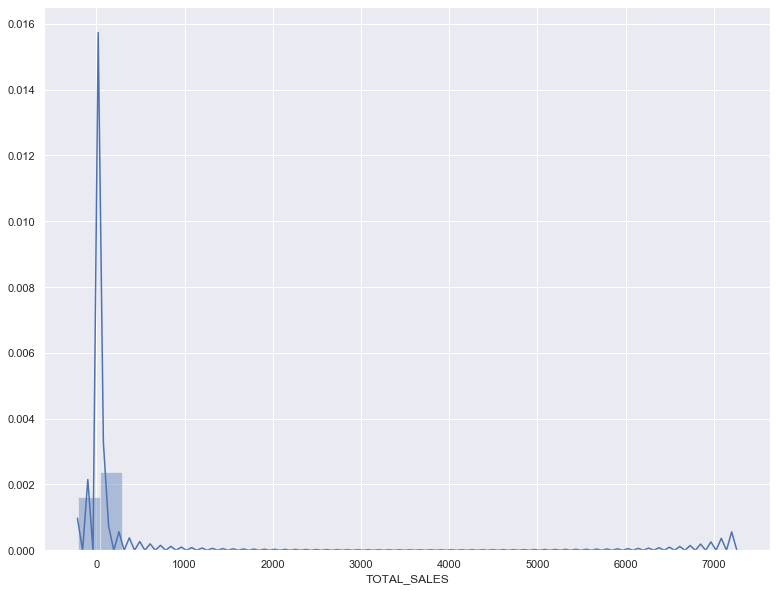

In [89]:
# Before going ahead with the variables correlation, let's check the target variable 'TOTAL_SALES' distribution
# The distribution is high POSITIVELY SKEWED
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(13,10)})
sns.distplot(PTS2['TOTAL_SALES'], bins=30)
plt.show(sns)

# OUTLIERS -Treatment

In [1]:
import pandas as pd
import numpy as np
import os

In [37]:
os.chdir = (r'\\10.0.7.226\ipba_group10')

In [38]:
os.getcwd()

'C:\\Users\\IPBAB047'

In [39]:
PTS2 = pd.read_csv(r'\\10.0.7.226\ipba_group10\merged_dataset.csv')

In [40]:
PTS2.columns

Index(['Unnamed: 0', 'LOC_IDNT', 'DBSKU', 'ONLINE_FLAG', 'FULL_PRICE_IND',
       'TOTAL_SALES', 'TOTAL_UNITS', 'TOTAL_SALES_PRFT', 'TOTAL_COST',
       'DEPARTMENT', 'CLASS', 'SUBCLASS', 'DEPARTMENT_NAME', 'CLASS_NAME',
       'SUBCLASS_NAME', 'CITY', 'STATE', 'STORE_TYPE', 'POSTAL_CD',
       'STORE_SIZE', 'DAY', 'MONTH', 'YEAR'],
      dtype='object')

In [6]:
PTS2.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
PTS2.head()

,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,...,CLASS_NAME,SUBCLASS_NAME,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE,DAY,MONTH,YEAR
0,1218,466896.0,0.0,NFP,16.80,1.0,1.30,15.5,10,3,...,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,5,9,2015
1,1218,466896.0,0.0,NFP,33.60,2.0,2.60,31.0,10,3,...,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,0,8,2015
2,1218,466896.0,0.0,NFP,21.00,1.0,5.50,15.5,10,3,...,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,1,9,2015
3,1218,466896.0,0.0,NFP,14.70,1.0,-0.80,15.5,10,3,...,Class 1,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,4,8,2015
4,1218,412445.0,0.0,NFP,29.99,1.0,12.99,17.0,10,2,...,Class 4,Sub Class 2,COLUMBIA,SC,Lifestyle Center,29229,3050.0,6,8,2015


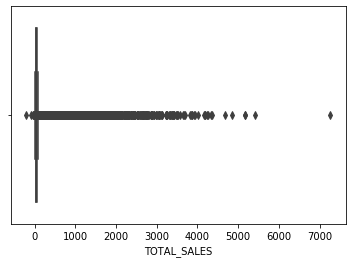

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Let's check the boxplot for our variable (target variable) TOTAL_SALES
# Not highly comprhensible 
sns.boxplot(PTS2['TOTAL_SALES'])
plt.show(sns)

In [9]:
# How many transactions happen per STATE?
PTS2['STATE'].value_counts().head(20)

NY    1016173
TX     702042
CA     627822
NJ     463954
FL     455096
PA     386292
IN     376191
MI     361231
IL     353432
MA     288887
MD     269163
VA     244073
OH     221005
NC     216596
GA     207816
CT     207507
MO     197978
WI     165540
MN     162962
LA     149233
Name: STATE, dtype: int64

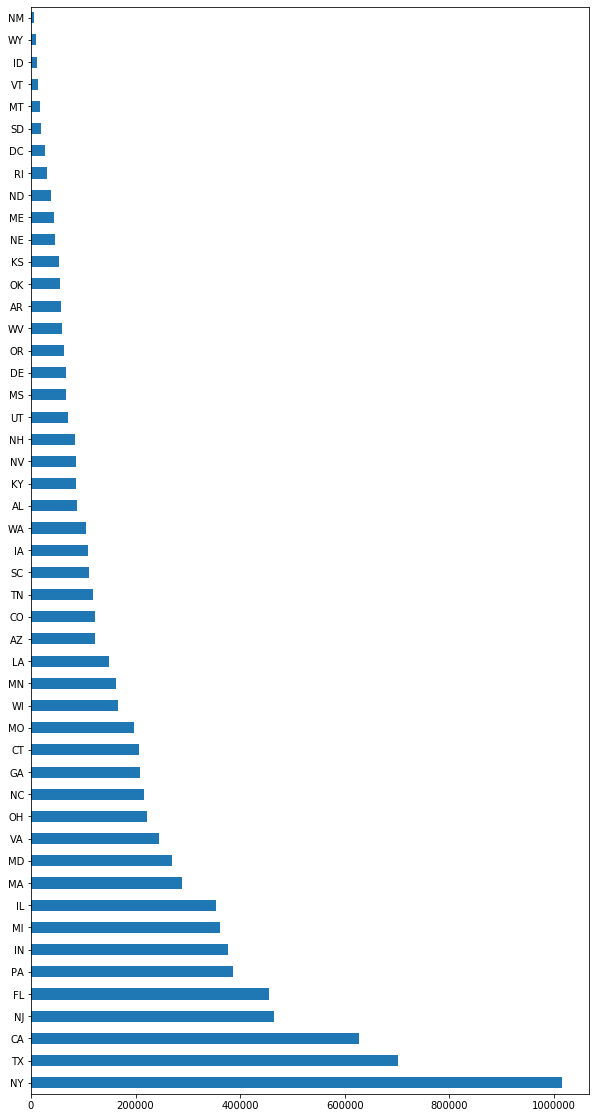

In [10]:
# Let's see how many transactions happen per STATE
PTS2['STATE'].value_counts().plot(kind='barh', figsize=(10,20))

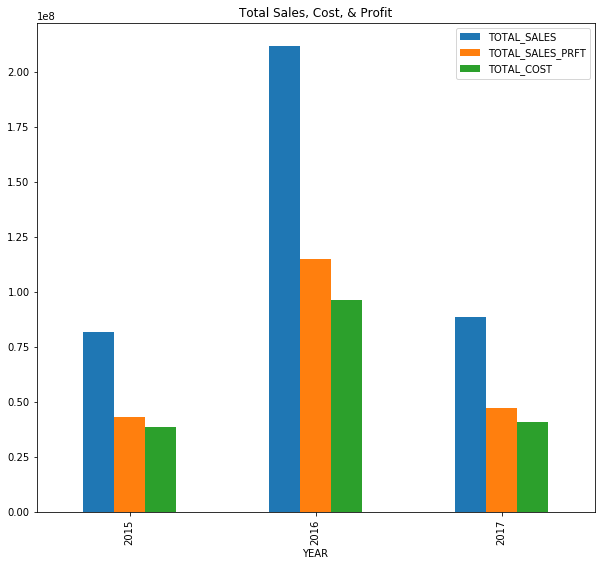

In [11]:
PTS2.groupby(['YEAR'])['TOTAL_SALES','TOTAL_SALES_PRFT','TOTAL_COST'].sum().plot(kind='bar', title = 'Total Sales, Cost, & Profit',figsize=(10,9))

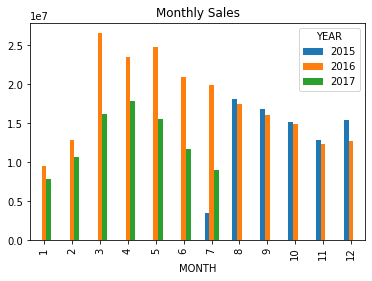

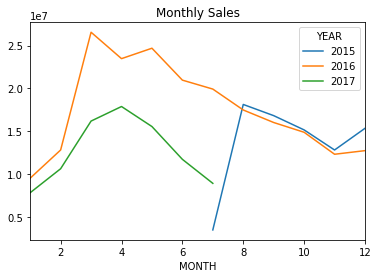

In [12]:
PTS2.pivot_table(index='MONTH',columns='YEAR',values='TOTAL_SALES',aggfunc=np.sum).plot(kind='bar',title='Monthly Sales')
PTS2.pivot_table(index='MONTH',columns='YEAR',values='TOTAL_SALES',aggfunc=np.sum).plot(kind='line',title='Monthly Sales')

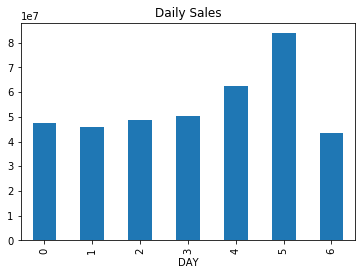

In [13]:
# Daily Sales Revenue
PTS2.groupby(['DAY'])['TOTAL_SALES'].sum().plot.bar(title = 'Daily Sales')

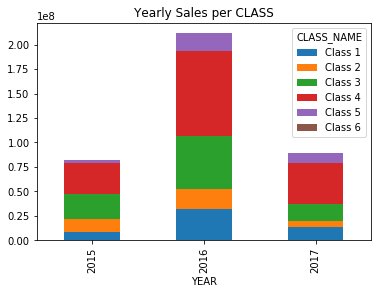

In [14]:
# Yearly Sales by CLASS
PTS2.pivot_table(index='YEAR',columns='CLASS_NAME', values = 'TOTAL_SALES', aggfunc=np.sum).plot.bar(stacked=True, title='Yearly Sales per CLASS')

In [15]:
# Let's use groupby and aggregate function to check Sales per class
online_sales = PTS2.groupby(['CLASS']).agg({'TOTAL_SALES': ['mean','median','min', 'max','count']})
print(online_sales)

      TOTAL_SALES                                 
             mean median     min      max    count
CLASS                                             
1       42.254260  39.50    0.01  4179.90   709914
2       42.189061  39.22  -29.99  5177.76  3814913
3       41.795039  39.20 -212.80  7260.45  1304619
4       49.441494  46.00    0.01  3382.38  1948128
5       37.040563  36.80    0.04  2234.02  1084803
99      20.840851  17.00    0.40   510.03     2432


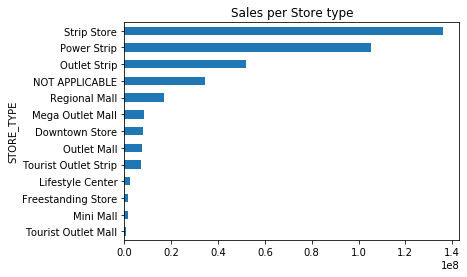

In [16]:
# TOTAL_SALES per store type
PTS2.groupby(['STORE_TYPE'])['TOTAL_SALES'].sum().sort_values(ascending=True).plot.barh(title='Sales per Store type')

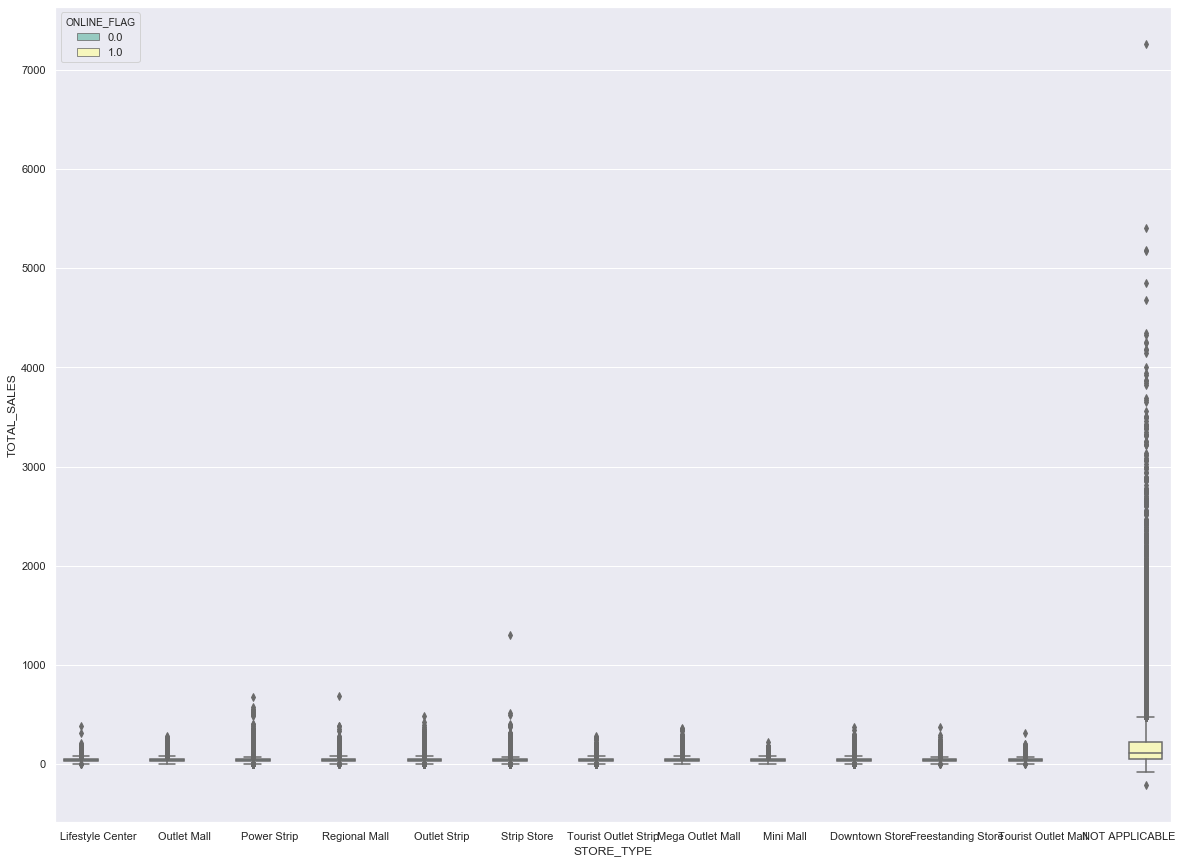

In [17]:
# Previously I have checked the boxplot for TOTAL_SALES, but I couldn't get a clear visual outlook from it,
# So now I am checking the boxplots of TOTAL_SALES for STORE_TYPE
# Most outliers reside where STORE_TYPE = NOT_APPLICABLE 
# It is highly likely that STORE = NOT APPLICABLE means ONLINE_STORE
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.boxplot(x="STORE_TYPE", y="TOTAL_SALES", hue='ONLINE_FLAG', data=PTS2, palette="Set3")

In [18]:
PTS2['STORE_TYPE'] = PTS2['STORE_TYPE'].str.replace('NOT APPLICABLE','Online Store')

In [19]:
PTS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8864809 entries, 0 to 8864808
Data columns (total 22 columns):
LOC_IDNT            int64
DBSKU               float64
ONLINE_FLAG         float64
FULL_PRICE_IND      object
TOTAL_SALES         float64
TOTAL_UNITS         float64
TOTAL_SALES_PRFT    float64
TOTAL_COST          float64
DEPARTMENT          int64
CLASS               int64
SUBCLASS            int64
DEPARTMENT_NAME     object
CLASS_NAME          object
SUBCLASS_NAME       object
CITY                object
STATE               object
STORE_TYPE          object
POSTAL_CD           int64
STORE_SIZE          float64
DAY                 int64
MONTH               int64
YEAR                int64
dtypes: float64(7), int64(8), object(7)
memory usage: 1.5+ GB


In [20]:
# Let's use groupby and aggregate function to check the mean sales price per store type
online_sales = PTS2.groupby(['STORE_TYPE']).agg({'TOTAL_SALES': ['mean','median','min', 'max','count']})
print(online_sales)

                     TOTAL_SALES                                   
                            mean   median     min      max    count
STORE_TYPE                                                         
Downtown Store         42.786805   40.770    0.01   378.00   187897
Freestanding Store     39.512671   39.000    0.60   378.36    42881
Lifestyle Center       39.143496   39.100    0.23   386.78    60922
Mega Outlet Mall       41.749411   40.000    0.01   367.50   197660
Mini Mall              38.709461   38.450    0.10   220.68    38903
Online Store          178.907234  111.425 -212.80  7260.45   191644
Outlet Mall            42.127229   41.210    0.01   280.00   179332
Outlet Strip           40.815010   40.000    0.01   480.00  1269209
Power Strip            39.558208   39.500    0.01   672.00  2665570
Regional Mall          40.472389   39.980    0.01   691.20   418755
Strip Store            39.806737   39.500    0.01  1297.51  3420901
Tourist Outlet Mall    42.311518   40.500    0.9

In [21]:
# Descriptive Statistics of our Price
PTS2['TOTAL_SALES'].describe().apply(lambda x: format(x, 'f'))

count    8864809.000000
mean          43.094200
std           40.885621
min         -212.800000
25%           29.990000
50%           39.500000
75%           48.250000
max         7260.450000
Name: TOTAL_SALES, dtype: object

In [22]:
# TOTAL_SALES Expected Values
# Expected Maximum Value is 75% value + (1.5*IQR)
print("Expected Max Value -->", 48+(1.5*20))
# Expected Minimum Value is 25% value - (1.5*IQR)
print("Expected Min Value -->", 28-(1.5*20))

Expected Max Value --> 78.0
Expected Min Value --> -2.0


In [23]:
# TOTAL_SALES_PRFT Expected Values
# Expected Maximum Value is 75% value + (1.5*IQR)
print("Expected Max Value -->", 30.36+(1.5*20.29))
# Expected Minimum Value is 25% value - (1.5*IQR)
print("Expected Min Value -->", 10.07-(1.5*20.29))

Expected Max Value --> 60.795
Expected Min Value --> -20.365


In [24]:
# TOTAL_COST Expected Values
# Expected Maximum Value is 75% value + (1.5*IQR)
print("Expected Max Value -->", 20+(1.5*5))
# Expected Minimum Value is 25% value - (1.5*IQR)
print("Expected Min Value -->", 15-(1.5*5))

Expected Max Value --> 27.5
Expected Min Value --> 7.5


In [25]:
# Let's see from the 10th percentile to the 90th, how theprice range looks like
PTS2['TOTAL_SALES'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])

0.1    20.00
0.2    26.00
0.3    31.96
0.4    36.17
0.5    39.50
0.6    43.60
0.7    47.05
0.8    51.60
0.9    59.50
Name: TOTAL_SALES, dtype: float64

In [26]:
# Let's see from the 90th to the 99th percentile, how theprice range looks like
PTS2['TOTAL_SALES'].quantile([.91,.92,.93,.94,.95,.96,.97,.98,.99])

0.91     60.0000
0.92     62.0000
0.93     64.0000
0.94     67.1400
0.95     68.4000
0.96     74.9100
0.97     84.0000
0.98    100.0000
0.99    138.8692
Name: TOTAL_SALES, dtype: float64

In [27]:
# Let's see from 0.1 the 1st percentile, how theprice range looks like
PTS2['TOTAL_SALES'].quantile([.01,.02,.03,.04,.05,.06,.07,.08,.09])

0.01    10.20
0.02    12.96
0.03    14.40
0.04    15.40
0.05    16.67
0.06    17.60
0.07    18.40
0.08    19.42
0.09    19.99
Name: TOTAL_SALES, dtype: float64

In [28]:
# Let's create a random sample to be able to manage a more size-to-code Dataset
PTS2_sample = PTS2.sample(frac=0.1, replace=False, random_state=1)

In [29]:
PTS2_sample.shape

(886481, 22)

In [30]:
PTS2_sample.head()

,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,...,CLASS_NAME,SUBCLASS_NAME,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE,DAY,MONTH,YEAR
1071942,519,460923.0,0.0,NFP,17.25,1.0,7.25,10.00,10,5,...,Class 2,Sub Class 5,BLOOMINGTON,MN,Power Strip,55431,3990.0,5,8,2015
7511745,1346,534180.0,0.0,NFP,37.40,1.0,21.65,15.75,10,5,...,Class 2,Sub Class 3,PALATINE,IL,Power Strip,60074,2957.0,3,4,2016
7111738,141,555375.0,0.0,NFP,38.40,1.0,19.90,18.50,10,4,...,Class 3,Sub Class 1,GREENVILLE,NC,Power Strip,27834,3190.0,0,12,2016
6705496,4150,2105957.0,1.0,FP,291.79,5.0,156.79,135.00,12,2,...,Class 4,Sub Class 2,GREENCASTLE,IN,Online Store,46135,1.0,3,9,2015
5828618,679,2131243.0,0.0,NFP,44.50,1.0,25.50,19.00,12,2,...,Class 4,Sub Class 4,SACRAMENTO,CA,Power Strip,95835,2898.0,0,5,2016


In [31]:
PTS2_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886481 entries, 1071942 to 4738873
Data columns (total 22 columns):
LOC_IDNT            886481 non-null int64
DBSKU               886481 non-null float64
ONLINE_FLAG         886481 non-null float64
FULL_PRICE_IND      886481 non-null object
TOTAL_SALES         886481 non-null float64
TOTAL_UNITS         886481 non-null float64
TOTAL_SALES_PRFT    886481 non-null float64
TOTAL_COST          886481 non-null float64
DEPARTMENT          886481 non-null int64
CLASS               886481 non-null int64
SUBCLASS            886481 non-null int64
DEPARTMENT_NAME     886481 non-null object
CLASS_NAME          886481 non-null object
SUBCLASS_NAME       886481 non-null object
CITY                886481 non-null object
STATE               886481 non-null object
STORE_TYPE          886481 non-null object
POSTAL_CD           886481 non-null int64
STORE_SIZE          886481 non-null float64
DAY                 886481 non-null int64
MONTH               8

In [32]:
# LET'S CHECK SOME RATIO FOR THE ORIGINAL DATASET VS. SAMPLED DATASET (10% its original size)

In [33]:
PTS2_sample['TOTAL_SALES'].describe().apply(lambda x: format(x, 'f'))

count    886481.000000
mean         43.128205
std          41.118505
min           0.010000
25%          29.990000
50%          39.500000
75%          48.370000
max        4002.750000
Name: TOTAL_SALES, dtype: object

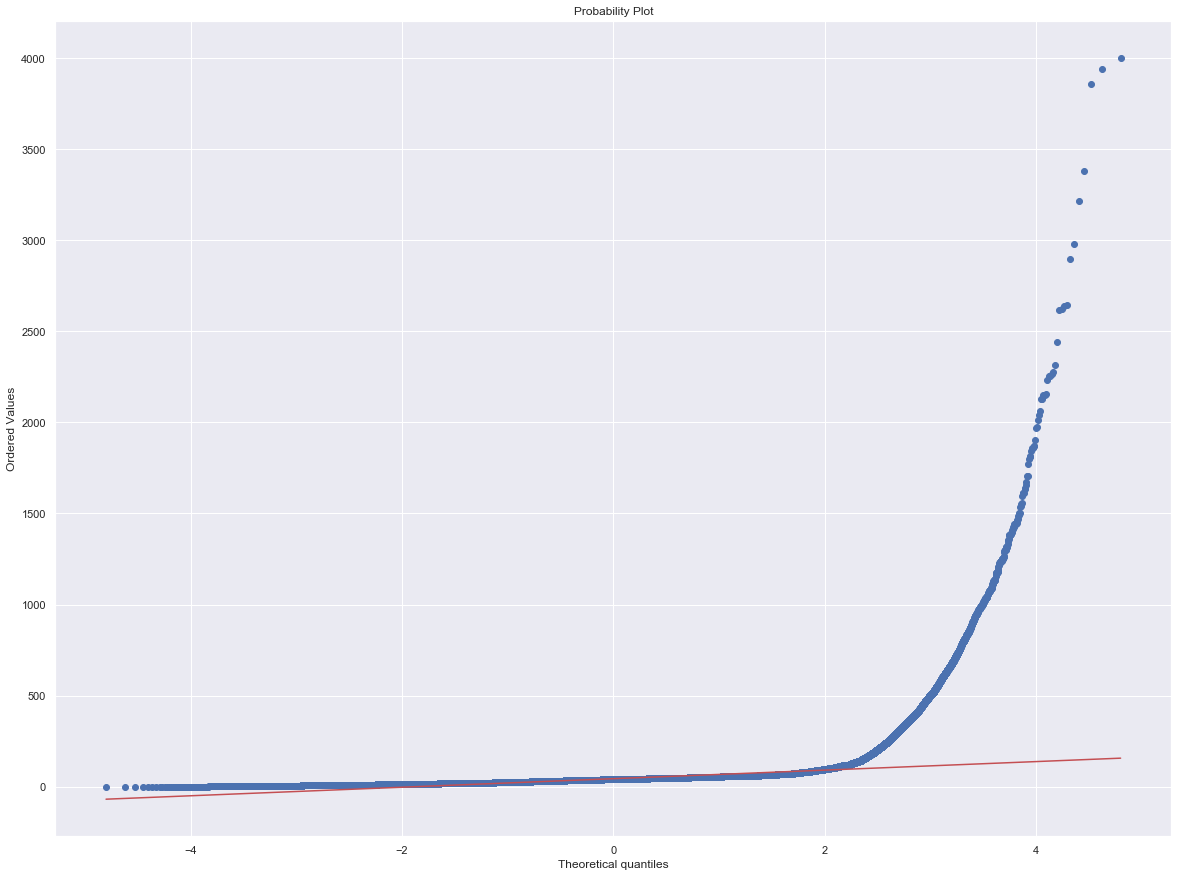

In [34]:
# TOTAL_SALES QQplot
from scipy import stats

fig = plt.figure()
res = stats.probplot(PTS2_sample['TOTAL_SALES'], plot=plt)
plt.show()

In [35]:
PTS2['TOTAL_SALES'].describe().apply(lambda x: format(x, 'f'))

count    8864809.000000
mean          43.094200
std           40.885621
min         -212.800000
25%           29.990000
50%           39.500000
75%           48.250000
max         7260.450000
Name: TOTAL_SALES, dtype: object

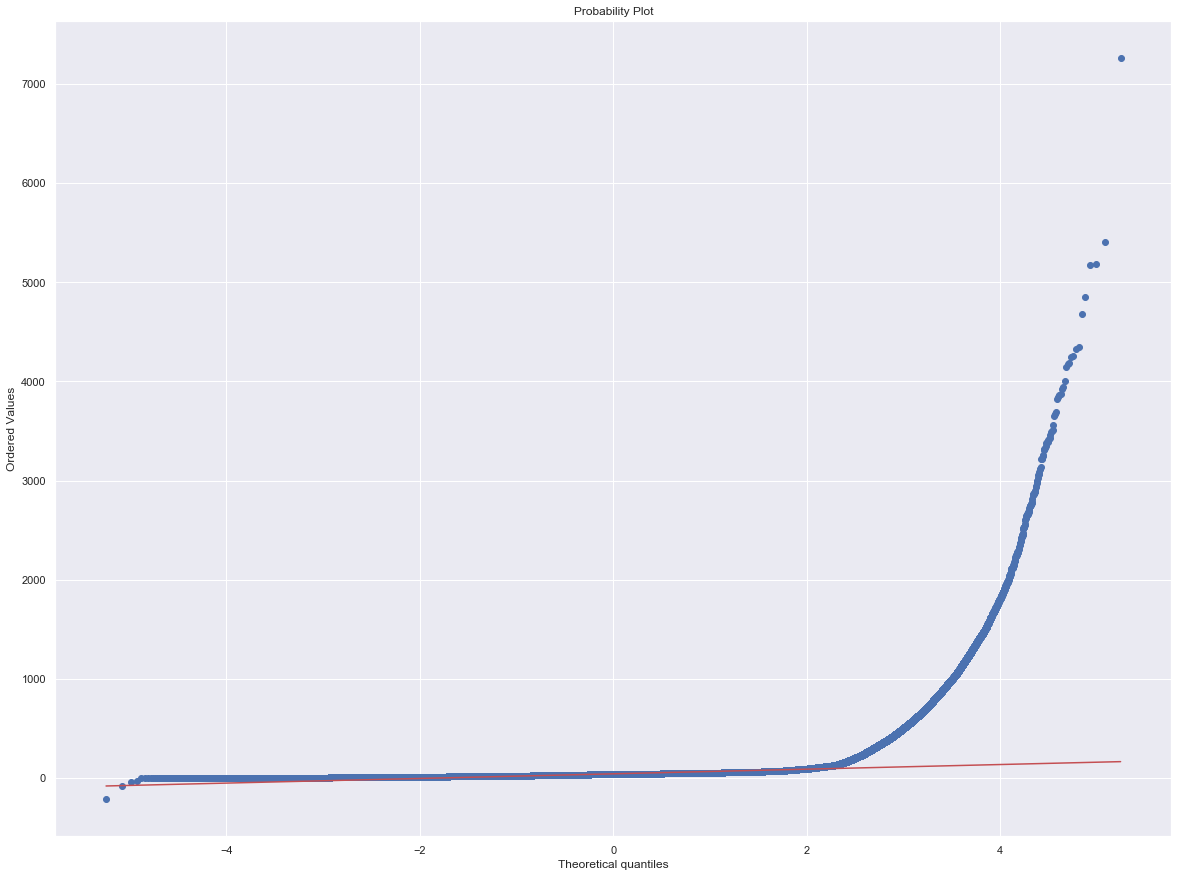

In [36]:
# TOTAL_SALES QQplot - Original dataset

fig = plt.figure()
res = stats.probplot(PTS2['TOTAL_SALES'], plot=plt)
plt.show()

In [37]:
PTS2_sample['TOTAL_SALES_PRFT'].describe().apply(lambda x: format(x, 'f'))

count    886481.000000
mean         23.230413
std          25.664029
min       -1329.000000
25%          11.300000
50%          23.050000
75%          31.000000
max        2552.510000
Name: TOTAL_SALES_PRFT, dtype: object

In [38]:
PTS2['TOTAL_SALES_PRFT'].describe().apply(lambda x: format(x, 'f'))

count    8864809.000000
mean          23.212073
std           25.623458
min        -4378.260000
25%           11.300000
50%           23.000000
75%           31.000000
max         4656.610000
Name: TOTAL_SALES_PRFT, dtype: object

In [39]:
PTS2_sample['TOTAL_COST'].describe().apply(lambda x: format(x, 'f'))

count    886481.000000
mean         19.897792
std          18.964798
min         -13.013600
25%          15.150000
50%          17.500000
75%          20.500000
max        1800.000000
Name: TOTAL_COST, dtype: object

In [40]:
PTS2['TOTAL_COST'].describe().apply(lambda x: format(x, 'f'))

count    8864809.000000
mean          19.882127
std           19.137562
min         -102.500000
25%           15.150000
50%           17.500000
75%           20.500000
max         5796.000000
Name: TOTAL_COST, dtype: object

In [41]:
PTS2_sample.isnull().sum()

LOC_IDNT            0
DBSKU               0
ONLINE_FLAG         0
FULL_PRICE_IND      0
TOTAL_SALES         0
TOTAL_UNITS         0
TOTAL_SALES_PRFT    0
TOTAL_COST          0
DEPARTMENT          0
CLASS               0
SUBCLASS            0
DEPARTMENT_NAME     0
CLASS_NAME          0
SUBCLASS_NAME       0
CITY                0
STATE               0
STORE_TYPE          0
POSTAL_CD           0
STORE_SIZE          0
DAY                 0
MONTH               0
YEAR                0
dtype: int64

In [42]:
# Let's check the IQR for the following variables on the sampled dataset
Q1s = PTS2_sample['TOTAL_SALES'].quantile(0.25)
Q3s = PTS2_sample['TOTAL_SALES'].quantile(0.75)
IQRs = Q3s -Q1s
print(IQRs)
print(Q1s)
print(Q3s)

18.38
29.99
48.37


In [43]:
# TOTAL_SALES Expected Values
# Expected Maximum Value is 75% value + (1.5*IQR)
print("Expected Max Value -->", 48+(1.5*20))
# Expected Minimum Value is 25% value - (1.5*IQR)
print("Expected Min Value -->", 28-(1.5*20))

Expected Max Value --> 78.0
Expected Min Value --> -2.0


In [44]:
# Let's get rid of the outliers for the variable TOTAL_SALES following the INTERQUARTILE RANGE's outliers detection method
PTS2_sample_out = PTS2_sample.loc[(PTS2_sample['TOTAL_SALES'] > -2) & (PTS2_sample['TOTAL_SALES'] < 78)]

In [45]:
PTS2_sample_out.shape

(853217, 22)

In [46]:
PTS2_sample_out['TOTAL_SALES'].describe()

count    853217.000000
mean         38.704082
std          13.605004
min           0.010000
25%          29.620000
50%          39.500000
75%          48.000000
max          77.990000
Name: TOTAL_SALES, dtype: float64

In [47]:
# How many rows have been dropped?

print("Acual Number of Rows -->", PTS2_sample.shape[0])
print("Number of Rows after treatment -->", PTS2_sample_out.shape[0])
print("Number of Records dropped -->", PTS2_sample.shape[0] - PTS2_sample_out.shape[0])

Acual Number of Rows --> 886481
Number of Rows after treatment --> 853217
Number of Records dropped --> 33264


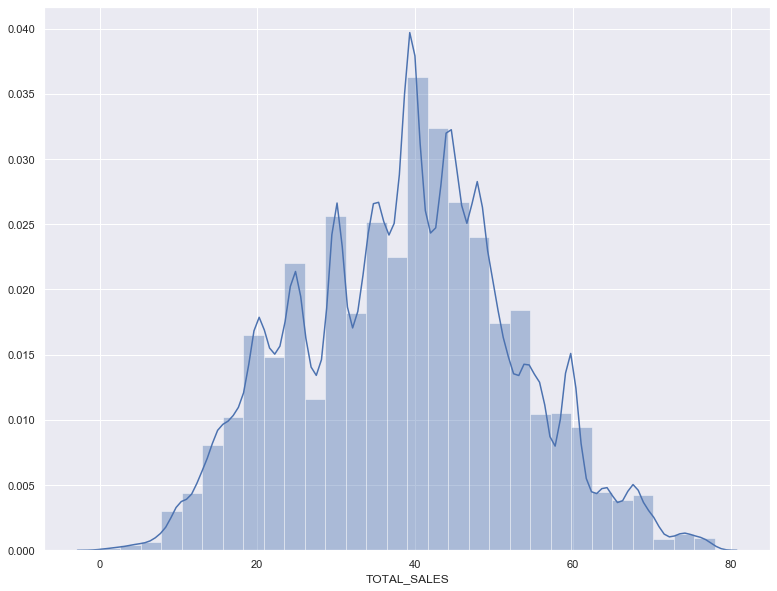

In [48]:
# Let's visualize the distribution of TOTAL_SALES after removing the outliers
sns.set(rc={'figure.figsize':(13,10)})
sns.distplot(PTS2_sample_out['TOTAL_SALES'], bins=30)
plt.show(sns)

In [49]:
# Let's get rid of the outliers for the variable TOTAL_SALES_PRFT following the INTERQUARTILE RANGE's outliers detection method
PTS2_sample_out1 = PTS2_sample_out.loc[(PTS2_sample_out['TOTAL_SALES_PRFT'] > -20.125) & (PTS2_sample_out['TOTAL_SALES_PRFT'] < 58.875)]

In [50]:
PTS2_sample_out1.shape

(852910, 22)

In [51]:
# How many rows have been dropped?

print("Acual Number of Rows -->", PTS2_sample.shape[0])
print("Number of Rows after treatment -->", PTS2_sample_out1.shape[0])
print("Number of Records dropped -->", PTS2_sample.shape[0] - PTS2_sample_out1.shape[0])

Acual Number of Rows --> 886481
Number of Rows after treatment --> 852910
Number of Records dropped --> 33571


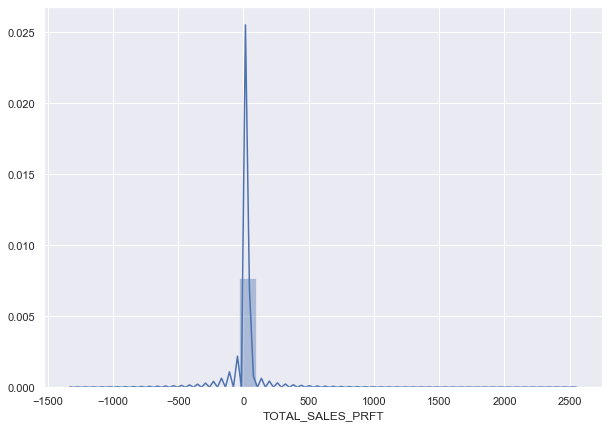

In [58]:
# Let's visualize the distribution of TOTAL_SALES BEFORE removing the outliers
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(PTS2_sample['TOTAL_SALES_PRFT'], bins=30)
plt.show(sns)

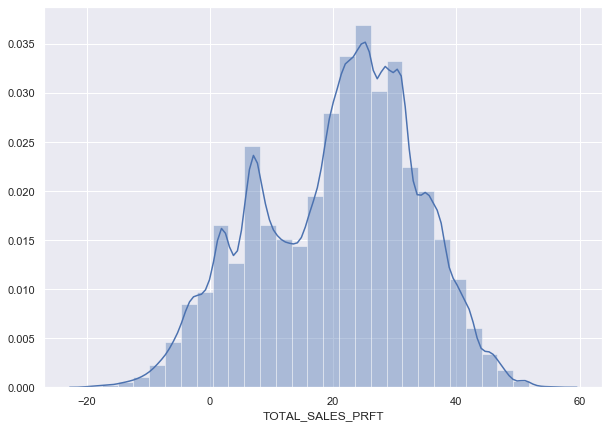

In [59]:
# Let's visualize the distribution of TOTAL_SALES after removing the outliers
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(PTS2_sample_out1['TOTAL_SALES_PRFT'], bins=30)
plt.show(sns)

In [60]:
PTS2_sample_out1['TOTAL_SALES_PRFT'].describe()

count    852910.000000
mean         20.719264
std          12.688727
min         -20.110000
25%          10.700000
50%          22.500000
75%          30.000000
max          56.940000
Name: TOTAL_SALES_PRFT, dtype: float64

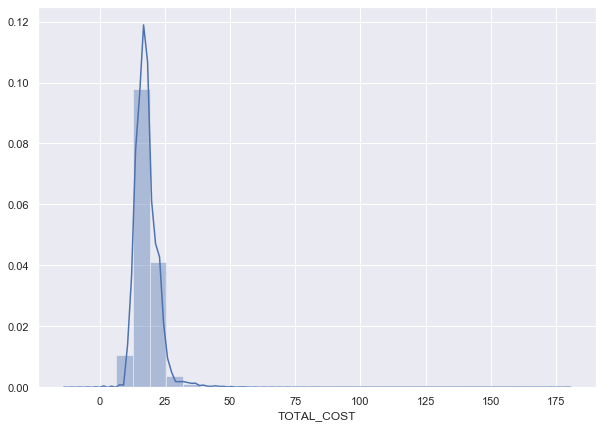

In [61]:
# Let's visualize the distribution of TOTAL_COST when TOTAL_SALES outliers have been removed
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(PTS2_sample_out['TOTAL_COST'], bins=30)
plt.show(sns)

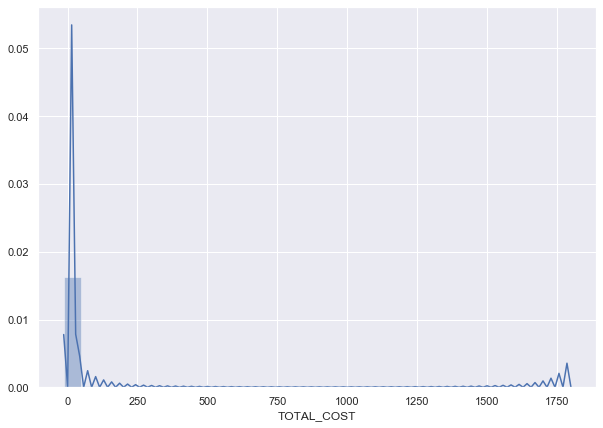

In [62]:
# Let's visualize the distribution of TOTAL_COST when TOTAL_SALES and TOTAL_SALES_PRFT' outliers have been removed
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(PTS2_sample['TOTAL_COST'], bins=30)
plt.show(sns)

In [63]:
PTS2_sample['TOTAL_COST'].describe()

count    886481.000000
mean         19.897792
std          18.964798
min         -13.013600
25%          15.150000
50%          17.500000
75%          20.500000
max        1800.000000
Name: TOTAL_COST, dtype: float64

In [64]:
# Let's check the IQR for the following variable (TOTAL_COST)
Q1c = PTS2_sample_out1['TOTAL_COST'].quantile(0.25)
Q3c = PTS2_sample_out1['TOTAL_COST'].quantile(0.75)
IQRc = Q3c -Q1c
print(IQRc)
print(Q1c)
print(Q3c)

5.0
15.0
20.0


In [65]:
# TOTAL_COST Expected Values
# Expected Maximum Value is 75% value + (1.5*IQR)
print("Expected Max Value -->", 19.75+(1.5*4.75))
# Expected Minimum Value is 25% value - (1.5*IQR)
print("Expected Min Value -->", 15-(1.5*4.75))

Expected Max Value --> 26.875
Expected Min Value --> 7.875


In [66]:
# Let's delete TOTAL_COST' outliers by using the IQR method again
PTS2_sample_out2 = PTS2_sample_out1.loc[(PTS2_sample_out1['TOTAL_COST'] > 7.875) & (PTS2_sample_out1['TOTAL_COST'] < 26.875)]

In [67]:
PTS2_sample_out2.shape

(825414, 22)

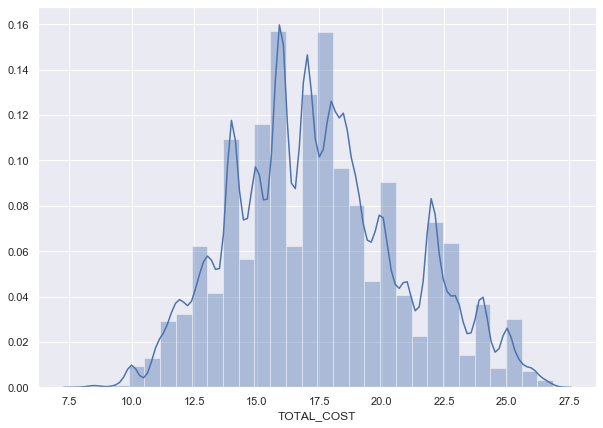

In [68]:
# Let's visually check the distribution of TOTAL_COST after deletion of outliers
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(PTS2_sample_out2['TOTAL_COST'], bins=30)
plt.show(sns)

In [69]:
PTS2_sample_out2['TOTAL_COST'].describe()

count    825414.000000
mean         17.515583
std           3.411517
min           8.000000
25%          15.000000
50%          17.000000
75%          19.750000
max          26.854700
Name: TOTAL_COST, dtype: float64

In [70]:
# How many rows have been dropped?

print("Acual Number of Rows -->", PTS2_sample.shape[0])
print("Number of Rows after treatment -->", PTS2_sample_out2.shape[0])
print("Number of Records dropped -->", PTS2_sample.shape[0] - PTS2_sample_out2.shape[0])

Acual Number of Rows --> 886481
Number of Rows after treatment --> 825414
Number of Records dropped --> 61067


In [71]:
# Let's add to our dataset non-cumulative continuous variables such as 'UNIT_PRICE', 'UNIT_SALES_PRFT', 'UNIT_COST'

In [72]:
PTS2_sample_out2['UNIT_PRICE'] = (PTS2_sample_out2['TOTAL_SALES'] / PTS2_sample_out2['TOTAL_UNITS'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
PTS2_sample_out2['UNIT_SALES_PRFT'] = (PTS2_sample_out2['TOTAL_SALES_PRFT'] / PTS2_sample_out2['TOTAL_UNITS'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
PTS2_sample_out2['UNIT_COST'] = (PTS2_sample_out2['TOTAL_COST'] / PTS2_sample_out2['TOTAL_UNITS'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
PTS2_sample_out2.head()

,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,...,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE,DAY,MONTH,YEAR,UNIT_PRICE,UNIT_SALES_PRFT,UNIT_COST
1071942,519,460923.0,0.0,NFP,17.25,1.0,7.25,10.00,10,5,...,MN,Power Strip,55431,3990.0,5,8,2015,17.25,7.25,10.00
7511745,1346,534180.0,0.0,NFP,37.40,1.0,21.65,15.75,10,5,...,IL,Power Strip,60074,2957.0,3,4,2016,37.40,21.65,15.75
7111738,141,555375.0,0.0,NFP,38.40,1.0,19.90,18.50,10,4,...,NC,Power Strip,27834,3190.0,0,12,2016,38.40,19.90,18.50
5828618,679,2131243.0,0.0,NFP,44.50,1.0,25.50,19.00,12,2,...,CA,Power Strip,95835,2898.0,0,5,2016,44.50,25.50,19.00
5947704,130,538835.0,0.0,FP,40.00,1.0,26.00,14.00,10,5,...,NE,Strip Store,68144,3684.0,5,3,2016,40.00,26.00,14.00


In [76]:
PTS2_sample_out2.shape

(825414, 25)

# VARIABLES CORRELATION 

In [77]:
# Let's take a look at the heatmap for the sampled dataset where we have removed outliers from its target variable (TOTAL_SALES),
#TOTAL_SALES_PRFT, TOTAL_COST
# At this stage I still have not deleted the above mentioned variables as they represent a mere copy (considering what are we interested in),
# of the newly generated variables: UNIT_PRICE, UNIT_SALES_PRFT, UNIT_COST
import seaborn as sns
corr1 = PTS2_sample_out2.corr()

(18.0, 0.0)

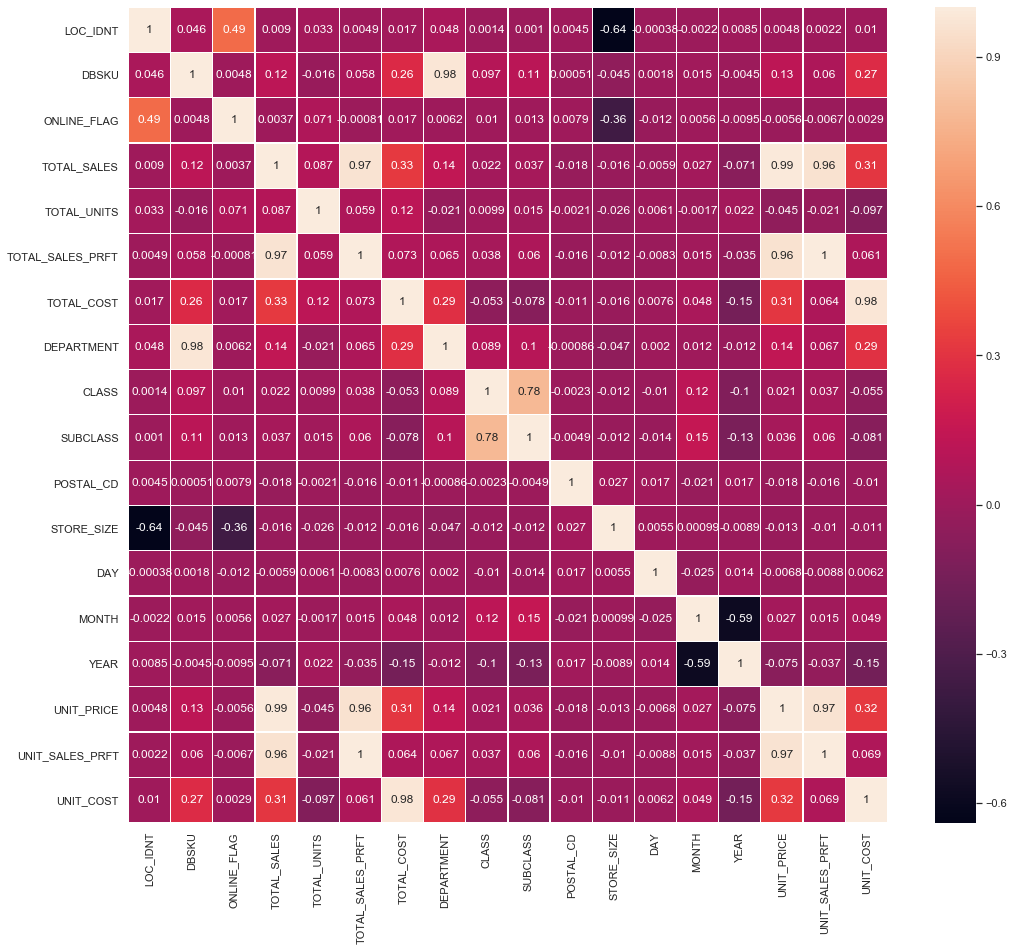

In [78]:
# The only highly correlated variable to our target (UNIT_PRICE | TOTAL_SALES) is UNIT_SALES_PRFT | TOTAL_SALES_PRFT
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(17,15))
sns.heatmap(corr1, annot=True, linewidths=.3,ax=ax,
           xticklabels=corr1.columns.values,
           yticklabels=corr1.columns.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [79]:
# Let's create a random sample to be able to manage a more size-to-code Dataset
# WE ARE SAMPLING A DATASET STARTING FROM THE PREVIOUSLY SAMPLED DATASET

PTS2_sample_small = PTS2_sample_out2.sample(frac=.04, replace=False, random_state=2)

In [80]:
PTS2_sample_small.shape

(33017, 25)

In [81]:
# The descriptive statstics of our target variable looks incredibly similar to that of both the previously sampled dataset, and 
# the original one
PTS2_sample_small['UNIT_PRICE'].describe()

count    33017.000000
mean        38.290550
std         13.205841
min          0.010000
25%         29.400000
50%         39.290000
75%         48.000000
max         76.000000
Name: UNIT_PRICE, dtype: float64

In [98]:
PTS2_sample_small['TOTAL_SALES'].describe()

count    33017.000000
mean        38.412249
std         13.275186
min          0.010000
25%         29.400000
50%         39.500000
75%         48.000000
max         77.800000
Name: TOTAL_SALES, dtype: float64

In [99]:
PTS2_sample_small['TOTAL_SALES_PRFT'].describe()

count    33017.000000
mean        20.894482
std         12.574328
min        -20.010000
25%         11.100000
50%         22.700000
75%         30.000000
max         55.900000
Name: TOTAL_SALES_PRFT, dtype: float64

In [100]:
PTS2_sample_small['TOTAL_COST'].describe()

count    33017.000000
mean        17.517767
std          3.403372
min          8.500000
25%         15.000000
50%         17.000000
75%         19.750000
max         26.800000
Name: TOTAL_COST, dtype: float64

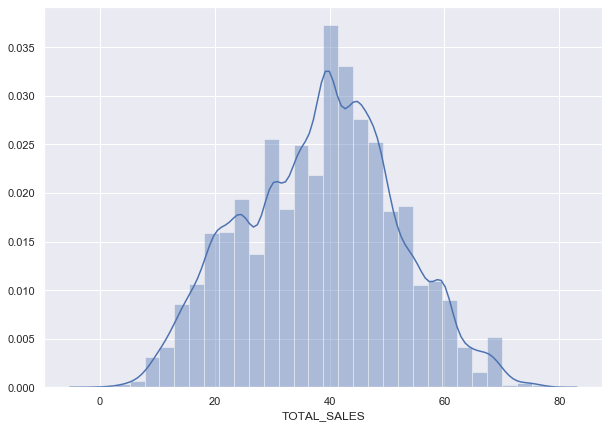

In [95]:
# Let's visualize the distribution of TOTAL_SALES BEFORE removing the outliers
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(PTS2_sample_small['TOTAL_SALES'], bins=30)
plt.show(sns)

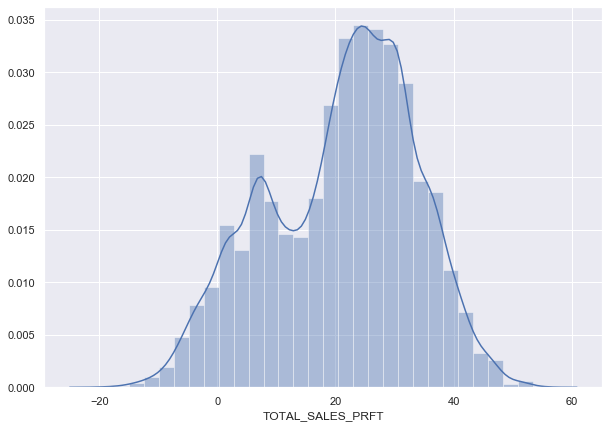

In [96]:
# Let's visualize the distribution of TOTAL_SALES BEFORE removing the outliers
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(PTS2_sample_small['TOTAL_SALES_PRFT'], bins=30)
plt.show(sns)

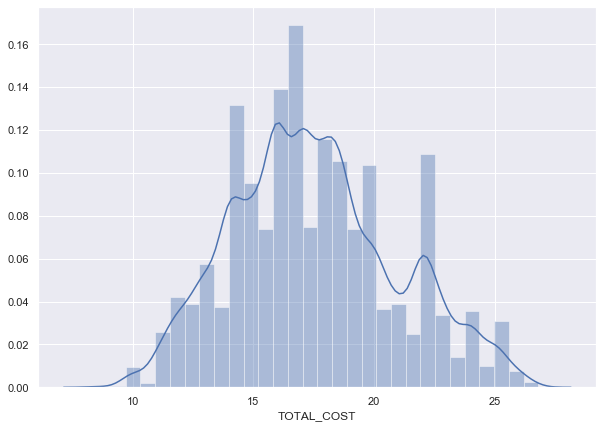

In [97]:
# Let's visualize the distribution of TOTAL_SALES BEFORE removing the outliers
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(PTS2_sample_small['TOTAL_COST'], bins=30)
plt.show(sns)

In [82]:
# Determine index for continuous variables
num_feats=PTS2_sample_small.dtypes[PTS2_sample_small.dtypes!='object'].index

In [83]:
# Calculate skew and sort
skew_feats=PTS2_sample_small[num_feats].skew().sort_values

In [84]:
print(skew_feats)

<bound method Series.sort_values of LOC_IDNT             2.045489
DBSKU                0.906313
ONLINE_FLAG         11.856305
TOTAL_SALES         -0.019856
TOTAL_UNITS         15.353540
TOTAL_SALES_PRFT    -0.323352
TOTAL_COST           0.295068
DEPARTMENT           0.779319
CLASS               26.221413
SUBCLASS             0.167883
POSTAL_CD            0.333549
STORE_SIZE          -0.827387
DAY                 -0.293262
MONTH                0.083130
YEAR                -0.051373
UNIT_PRICE          -0.030544
UNIT_SALES_PRFT     -0.329150
UNIT_COST            0.281997
dtype: float64>


(18.0, 0.0)

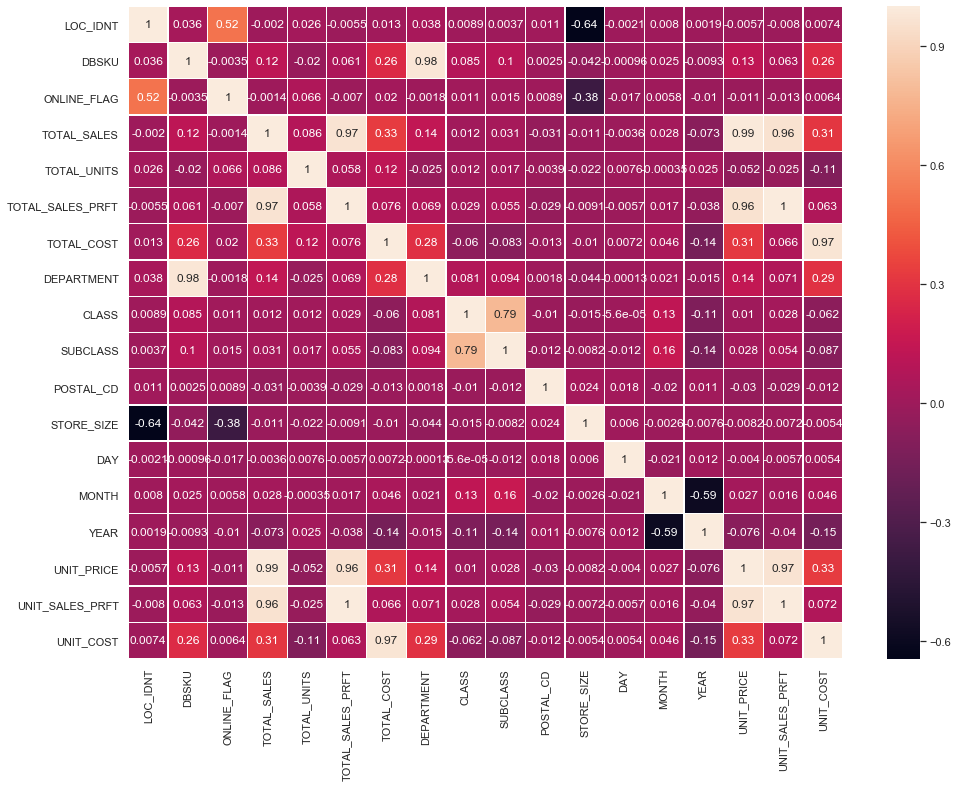

In [85]:
# Build the correlation matrix based on the new sampled dataset
matrix = PTS2_sample_small.corr()
f, ax =plt.subplots(figsize=(16,12))
sns.heatmap(matrix, annot=True, linewidths=.3,ax=ax,
           xticklabels=matrix.columns.values,
           yticklabels=matrix.columns.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [86]:
# Let's check with a function wheter what it is graphically represented is true in terms of correlation

interesting_variables = matrix['UNIT_PRICE'].sort_values(ascending=False)
# Filter out tatget variables (UNIT_PRICE) and variables with a low correlation score (v such that -0.6 <= v <= 0.6)
interesting_variables = interesting_variables[abs(interesting_variables) >= 0.6]
interesting_variables = interesting_variables[interesting_variables.index != 'UNIT_PRICE']
interesting_variables

TOTAL_SALES         0.989435
UNIT_SALES_PRFT     0.966577
TOTAL_SALES_PRFT    0.959843
Name: UNIT_PRICE, dtype: float64

In [87]:
# < 0.6
interesting_variables = matrix['UNIT_PRICE'].sort_values(ascending=False)
interesting_variables = interesting_variables[abs(interesting_variables) <= -0.6]
interesting_variables = interesting_variables[interesting_variables.index != 'UNIT_PRICE']
interesting_variables

Series([], Name: UNIT_PRICE, dtype: float64)

In [88]:
# VIF - checking multicollinearity
# Let's define a simple function that we can feed afterwards to our numeric dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [89]:
# Let's create an object to include only numeric variables (continuous and categorical)
PTS2_num = PTS2_sample_small._get_numeric_data()

PTS2_num.head()

,LOC_IDNT,DBSKU,ONLINE_FLAG,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,DEPARTMENT,CLASS,SUBCLASS,POSTAL_CD,STORE_SIZE,DAY,MONTH,YEAR,UNIT_PRICE,UNIT_SALES_PRFT,UNIT_COST
4339447,60,534198.0,0.0,27.60,1.0,14.10,13.50,10,2,21,12601,3257.0,6,3,2016,27.60,14.10,13.50
2418015,167,2134783.0,0.0,57.37,1.0,32.37,25.00,12,2,20,60516,3647.0,3,9,2016,57.37,32.37,25.00
5247633,693,2133033.0,0.0,15.60,1.0,1.45,14.15,12,3,30,37862,3174.0,3,10,2016,15.60,1.45,14.15
7806713,646,2124941.0,0.0,59.00,1.0,34.50,24.50,12,2,20,11234,2820.0,1,5,2016,59.00,34.50,24.50
3923468,353,482083.0,0.0,24.00,1.0,8.20,15.80,10,4,41,43123,3342.0,5,3,2016,24.00,8.20,15.80


In [90]:
# Let's feed our function and see the VIF related to each numeric variable
X = PTS2_num.iloc[:,:-1]

calc_vif(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,LOC_IDNT,5.506373e+00
1,DBSKU,6.583081e+01
2,ONLINE_FLAG,1.390359e+00
3,TOTAL_SALES,inf
4,TOTAL_UNITS,1.671388e+04
5,TOTAL_SALES_PRFT,inf
6,TOTAL_COST,inf
7,DEPARTMENT,3.181991e+03
8,CLASS,1.113812e+01
9,SUBCLASS,1.613637e+01


In [91]:
# Now, I will get rid of the variables with the higher VARIANCE, one by one, up until we see the VIF of the remaining 
# variables go down in a range that generally stays below 5.
# We end up with these 3 variables

X = PTS2_num.drop(['TOTAL_SALES','TOTAL_SALES_PRFT',
                  'TOTAL_COST','UNIT_PRICE','UNIT_SALES_PRFT','UNIT_COST','TOTAL_UNITS','DEPARTMENT','YEAR','STORE_SIZE','SUBCLASS'],axis=1)
calc_vif(X)

,variables,VIF
0,LOC_IDNT,3.291721
1,DBSKU,2.581350
2,ONLINE_FLAG,1.337628
3,CLASS,3.777714
4,POSTAL_CD,2.730977
5,DAY,3.274382
6,MONTH,4.052754


In [92]:
from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate Spearman's correlation coefficient
coef, p =spearmanr(PTS2_sample_small.LOC_IDNT, PTS2_sample_small.POSTAL_CD)
print('Spearmans correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p);
    
print('===========================================')
    
# Calculate Kendall's correlation coefficient
coef, p =kendalltau(PTS2_sample_small.LOC_IDNT, PTS2_sample_small.POSTAL_CD)
print('Kendalls correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.029
Samples are correlated (reject H0) p=0.000
Kendalls correlation coefficient: 0.019
Samples are correlated (reject H0) p=0.000


In [93]:
# CORRELATION - DEPARTMENT and DEPARTMENT_NAME -----WE CAN GET RID OF DEPARTMENT_NAME (multicollinear)
from scipy.stats import spearmanr, kendalltau

# Calculate Spearman's correlation coefficient
coef, p =spearmanr(PTS2_sample_small.DEPARTMENT, PTS2_sample_small.DEPARTMENT_NAME)
print('Spearmans correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p);
    
print('===========================================')
    
# Calculate Kendall's correlation coefficient
coef, p =kendalltau(PTS2_sample_small.DEPARTMENT, PTS2_sample_small.DEPARTMENT_NAME)
print('Kendalls correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -1.000
Samples are correlated (reject H0) p=0.000
Kendalls correlation coefficient: -1.000
Samples are correlated (reject H0) p=0.000


Spearmans correlation coefficient: 0.971
Samples are correlated (reject H0) p=0.000
Kendalls correlation coefficient: 0.927
Samples are correlated (reject H0) p=0.000


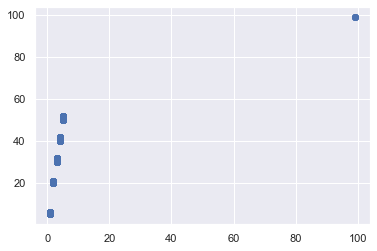

In [94]:
# CORRELATION - CLASS and SUBCLASS -------- WE CAN GET RID OF CLASS (multicollinear)
from scipy.stats import spearmanr, kendalltau

# Calculate Spearman's correlation coefficient
coef, p =spearmanr(PTS2_sample_small.CLASS, PTS2_sample_small.SUBCLASS)
print('Spearmans correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p);
    
print('===========================================')
    
# Calculate Kendall's correlation coefficient
coef, p =kendalltau(PTS2_sample_small.CLASS, PTS2_sample_small.SUBCLASS)
print('Kendalls correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p);
    
# plot
plt.scatter(PTS2_sample_small.CLASS, PTS2_sample_small.SUBCLASS)
plt.show()


Spearmans correlation coefficient: 0.072
Samples are correlated (reject H0) p=0.000
Kendalls correlation coefficient: 0.063
Samples are correlated (reject H0) p=0.000


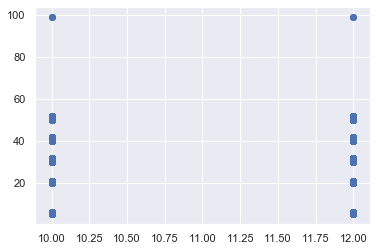

In [89]:
# CORRELATION - DEPARTMENT and SUBCLASS
from scipy.stats import spearmanr, kendalltau

# Calculate Spearman's correlation coefficient
coef, p =spearmanr(PTS2_sample_small.DEPARTMENT, PTS2_sample_small.SUBCLASS)
print('Spearmans correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p);
    
print('===========================================')
    
# Calculate Kendall's correlation coefficient
coef, p =kendalltau(PTS2_sample_small.DEPARTMENT, PTS2_sample_small.SUBCLASS)
print('Kendalls correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p);
    
# plot
plt.scatter(PTS2_sample_small.DEPARTMENT, PTS2_sample_small.SUBCLASS)
plt.show()

Spearmans correlation coefficient: -0.837
Samples are correlated (reject H0) p=0.000
Kendalls correlation coefficient: -0.723
Samples are correlated (reject H0) p=0.000


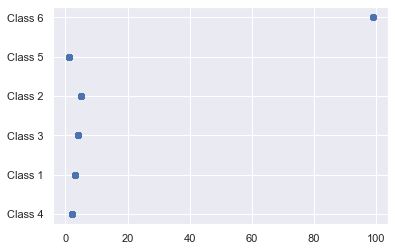

In [90]:
# CORRELATION - CLASS and CLASS_NAME
from scipy.stats import spearmanr, kendalltau

# Calculate Spearman's correlation coefficient
coef, p =spearmanr(PTS2_sample_small.CLASS, PTS2_sample_small.CLASS_NAME)
print('Spearmans correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p);
    
print('===========================================')
    
# Calculate Kendall's correlation coefficient
coef, p =kendalltau(PTS2_sample_small.CLASS, PTS2_sample_small.CLASS_NAME)
print('Kendalls correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p);
    
# plot
plt.scatter(PTS2_sample_small.CLASS, PTS2_sample_small.CLASS_NAME)
plt.show()


In [91]:
# CORRELATION - SUBCLASS and SUBCLASS_NAME
from scipy.stats import spearmanr, kendalltau

# Calculate Spearman's correlation coefficient
coef, p =spearmanr(PTS2_sample_small.SUBCLASS, PTS2_sample_small.SUBCLASS_NAME)
print('Spearmans correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p);
    
print('===========================================')
    
# Calculate Kendall's correlation coefficient
coef, p =kendalltau(PTS2_sample_small.SUBCLASS, PTS2_sample_small.SUBCLASS_NAME)
print('Kendalls correlation coefficient: %.3f' % coef)
# Interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) P=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.308
Samples are correlated (reject H0) p=0.000
Kendalls correlation coefficient: -0.266
Samples are correlated (reject H0) p=0.000


In [92]:
# LET'S now drop all of the not very useful numeric variables we got rid of by doing the VIF analysis, and store the 
# remaining variables in the new df 'Pdrop'

In [93]:
Pdrop = PTS2_sample_small.drop(['TOTAL_SALES','TOTAL_SALES_PRFT',
                         'TOTAL_COST','CLASS','CLASS_NAME','DEPARTMENT_NAME','TOTAL_UNITS'], axis=1)

In [94]:
Pdrop.shape

(33017, 18)

In [95]:
Pdrop.head()

,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,DEPARTMENT,SUBCLASS,SUBCLASS_NAME,CITY,STATE,STORE_TYPE,POSTAL_CD,STORE_SIZE,DAY,MONTH,YEAR,UNIT_PRICE,UNIT_SALES_PRFT,UNIT_COST
4339447,60,534198.0,0.0,FP,10,21,Sub Class 2,POUGHKEEPSIE,NY,Strip Store,12601,3257.0,6,3,2016,27.60,14.10,13.50
2418015,167,2134783.0,0.0,NFP,12,20,Sub Class 4,DOWNERS GROVE,IL,Strip Store,60516,3647.0,3,9,2016,57.37,32.37,25.00
5247633,693,2133033.0,0.0,NFP,12,30,Sub Class 4,SEVIERVILLE,TN,Outlet Strip,37862,3174.0,3,10,2016,15.60,1.45,14.15
7806713,646,2124941.0,0.0,NFP,12,20,Sub Class 4,BROOKLYN,NY,Strip Store,11234,2820.0,1,5,2016,59.00,34.50,24.50
3923468,353,482083.0,0.0,NFP,10,41,Sub Class 2,GROVE CITY,OH,Power Strip,43123,3342.0,5,3,2016,24.00,8.20,15.80


In [96]:
# Let's have another look to variables correlations using a heatmap within the new dataset 
corr2 = Pdrop.corr()

(13.0, 0.0)

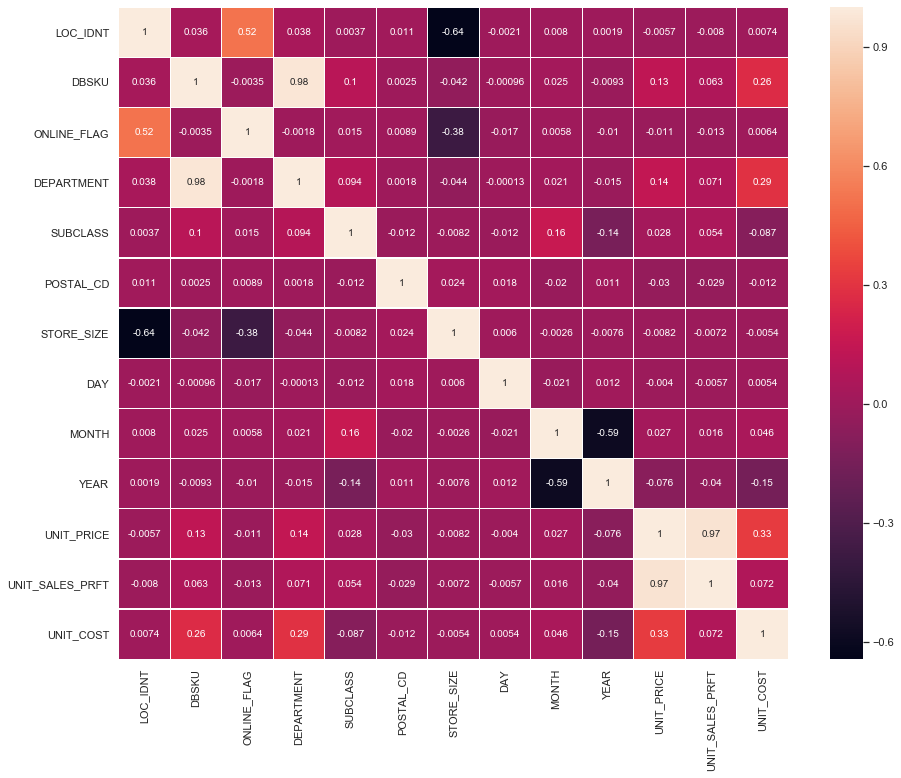

In [97]:
# Build the correlation matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr2, annot=True, linewidths=.3,ax=ax,
           xticklabels=corr2.columns.values,
           yticklabels=corr2.columns.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [98]:
# Again, UNIT_SALES_PRFT is the only higlhy (and positively) correlated variable to our target UNIT_PRICE

interesting_variables = corr2['UNIT_PRICE'].sort_values(ascending=False)
# Filter out tatget variables (UNIT_PRICE) and variables with a low correlation score (v such that -0.6 <= v <= 0.6)
interesting_variables = interesting_variables[abs(interesting_variables) >= 0.6]
interesting_variables = interesting_variables[interesting_variables.index != 'UNIT_PRICE']
interesting_variables

UNIT_SALES_PRFT    0.966577
Name: UNIT_PRICE, dtype: float64

In [99]:
# Let's now get dummies for the below indicated variables (mostly interesting because of our project statement)

In [100]:
# Let's now get dummies for the below indicated variables (mostly interesting because of our project statement)
Pdummies = pd.get_dummies(Pdrop, columns = ['SUBCLASS_NAME','SUBCLASS','DEPARTMENT','STORE_TYPE','ONLINE_FLAG','FULL_PRICE_IND',])

In [101]:
Pdummies.head()

,LOC_IDNT,DBSKU,CITY,STATE,POSTAL_CD,STORE_SIZE,DAY,MONTH,YEAR,UNIT_PRICE,...,STORE_TYPE_Outlet Strip,STORE_TYPE_Power Strip,STORE_TYPE_Regional Mall,STORE_TYPE_Strip Store,STORE_TYPE_Tourist Outlet Mall,STORE_TYPE_Tourist Outlet Strip,ONLINE_FLAG_0.0,ONLINE_FLAG_1.0,FULL_PRICE_IND_FP,FULL_PRICE_IND_NFP
4339447,60,534198.0,POUGHKEEPSIE,NY,12601,3257.0,6,3,2016,27.60,...,0,0,0,1,0,0,1,0,1,0
2418015,167,2134783.0,DOWNERS GROVE,IL,60516,3647.0,3,9,2016,57.37,...,0,0,0,1,0,0,1,0,0,1
5247633,693,2133033.0,SEVIERVILLE,TN,37862,3174.0,3,10,2016,15.60,...,1,0,0,0,0,0,1,0,0,1
7806713,646,2124941.0,BROOKLYN,NY,11234,2820.0,1,5,2016,59.00,...,0,0,0,1,0,0,1,0,0,1
3923468,353,482083.0,GROVE CITY,OH,43123,3342.0,5,3,2016,24.00,...,0,1,0,0,0,0,1,0,0,1


In [102]:
Pdummies.shape

(33017, 52)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


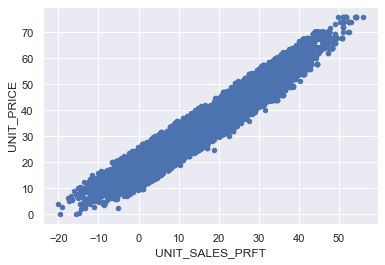

In [103]:
# Let's look at the relation between UNIT_PRICE and UNIT_SALES_PRFT with a scatterplot.
# It looks like is outliers free, and the relation between the two Vs is positive
data = pd.concat([Pdummies['UNIT_PRICE'], Pdummies['UNIT_SALES_PRFT']], axis=1)
data.plot.scatter(x='UNIT_SALES_PRFT', y='UNIT_PRICE')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


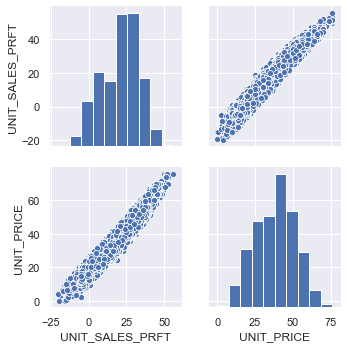

In [104]:
# The like-normal distribution of the two related variables here is clear
cols = interesting_variables.index.values.tolist() + ['UNIT_PRICE']
sns.pairplot(Pdummies[cols], size=2.5)
plt.show()

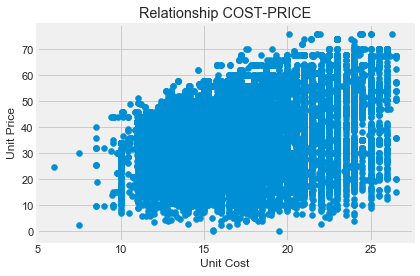

In [191]:
plt.scatter(Pdummies['UNIT_COST'],Pdummies['UNIT_PRICE'])
plt.rcParams['axes.facecolor'] = 'black'
plt.title('Relationship COST-PRICE')
plt.xlabel('Unit Cost')
plt.ylabel('Unit Price')
plt.show()

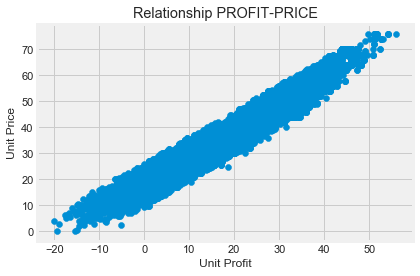

In [189]:
plt.scatter(Pdummies['UNIT_SALES_PRFT'],Pdummies['UNIT_PRICE'])
plt.title('Relationship PROFIT-PRICE')
plt.xlabel('Unit Profit')
plt.ylabel('Unit Price')
plt.show()

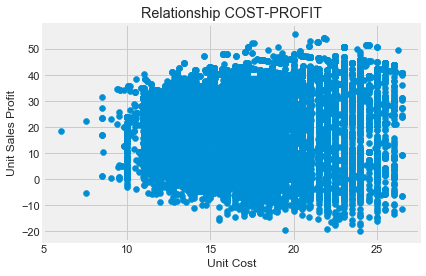

In [190]:
plt.scatter(Pdummies['UNIT_COST'],Pdummies['UNIT_SALES_PRFT'])
plt.title('Relationship COST-PROFIT')
plt.xlabel('Unit Cost')
plt.ylabel('Unit Sales Profit')
plt.show()

In [105]:
# Let's define X and Y
# X = features
# y = price

In [106]:
price = Pdummies['UNIT_PRICE']
features = Pdummies.drop(['UNIT_PRICE','UNIT_SALES_PRFT','STATE','CITY'], axis=1)

In [107]:
price1 = Pdrop['UNIT_PRICE']
features1 = Pdrop.drop(['UNIT_PRICE','UNIT_SALES_PRFT','STATE','CITY'], axis=1)

In [108]:
# IMPORT R2_SCORE
from sklearn.metrics import r2_score,mean_squared_error

def performance_metric(y_true, y_predict):
    # calculates and returns the performance score between true (y_true) and predicted (y_predict) values based on the metric chosen
    R2_score = r2_score(y_true, y_predict)
    MSE_score = mean_squared_error(y_true, y_predict)
    return R2_score, MSE_score

In [109]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=100)

print("Training and testing split was successsful.")

Training and testing split was successsful.


In [110]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(features1, price1, test_size=0.2, random_state=100)

print("Training and testing split was successsful.")

Training and testing split was successsful.


In [111]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# LINEAR REGRESSION

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [113]:
model_lin = linear_model.LinearRegression()
model_lin.fit(X_train,y_train)

LinearRegression()

In [114]:
print('Coefficients: \n', model_lin.coef_)
print('Variance score: {}'.format(model_lin.score(X_test,y_test)))

Coefficients: 
 [-4.11860958e-04 -1.10549025e-06 -9.86147468e-06 -3.55666163e-04
  3.72375938e-02 -1.28803445e-01 -5.30731888e-02  1.07878582e+00
  3.19679131e+00  3.12045986e+00  4.22372782e-02  3.59386597e+00
 -1.61835672e+00  6.17987060e-01 -8.95298476e+00 -1.50901028e+00
  4.50146272e-01  2.24453871e-01  2.74497304e-01  2.15094108e+00
  1.91824512e-01 -3.84978491e-02  2.72748129e+00  2.20399177e+00
  3.23528916e+00  4.22372782e-02  6.17987060e-01 -1.61835672e+00
 -8.95298476e+00 -2.04293136e+00  2.04293136e+00  3.49217965e-02
 -2.64297131e-01 -2.33878660e-01 -8.64016480e-02  5.18711276e-01
 -1.91890930e+00  6.54270405e-01  1.78707791e-01  1.00507886e-01
  1.89041166e-02 -1.54253303e-01  1.27884882e+00 -1.27132055e-01
  1.91890930e+00 -1.91890930e+00  8.69538969e+00 -8.69538969e+00]
Variance score: 0.471104736860828


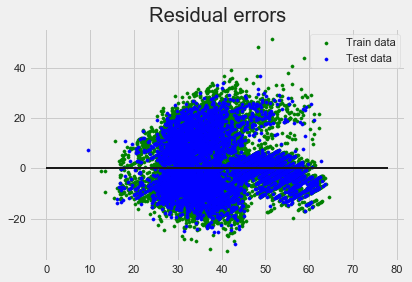

In [115]:
# Plot for residual error
plt.style.use('fivethirtyeight')
# Plot residual errors in training data
plt.scatter(model_lin.predict(X_train), model_lin.predict(X_train) - y_train, color = "green",
           s = 10, label = 'Train data')
# Plot residual errors in test data
plt.scatter(model_lin.predict(X_test), model_lin.predict(X_test) - y_test, color = "blue",
           s = 10, label = 'Test data')
## Plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 78, linewidth = 2)
## Plotting legend
plt.legend(loc ='upper right')
## Plot title
plt.title("Residual errors")
plt.show()

# RANDOM FOREST REGRESSOR

In [116]:
# Let's try with a RANDOM FOREST regression

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, oob_score=True,n_jobs=-1, random_state=42)

In [117]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [118]:
model.oob_score_

0.7865986265055964

In [214]:
for w in range(10,100,10):
    model=RandomForestRegressor(n_estimators=w,oob_score=True, random_state=42)
    model.fit(X_train,y_train)
    oob=model.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


For n_estimators = 10
OOB score is 0.6243968618833451
************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


For n_estimators = 20
OOB score is 0.7580071088513909
************************
For n_estimators = 30
OOB score is 0.7708245541091368
************************
For n_estimators = 40
OOB score is 0.7775998014757093
************************
For n_estimators = 50
OOB score is 0.7799629347745498
************************
For n_estimators = 60
OOB score is 0.7814109780871583
************************
For n_estimators = 70
OOB score is 0.7834088690419828
************************
For n_estimators = 80
OOB score is 0.7845484304079753
************************
For n_estimators = 90
OOB score is 0.7859157020233106
************************


In [215]:
# Our best n_estimators = ....

for w in range(90,200,10):
    model=RandomForestRegressor(n_estimators=w,oob_score=True, random_state=42)
    model.fit(X_train,y_train)
    oob=model.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 90
OOB score is 0.7859157020233106
************************
For n_estimators = 100
OOB score is 0.7865986265055964
************************
For n_estimators = 110
OOB score is 0.786762490066383
************************
For n_estimators = 120
OOB score is 0.7873163333211528
************************
For n_estimators = 130
OOB score is 0.7879335806533665
************************
For n_estimators = 140
OOB score is 0.7887214979768251
************************
For n_estimators = 150
OOB score is 0.7890399931460832
************************
For n_estimators = 160
OOB score is 0.789464797932944
************************
For n_estimators = 170
OOB score is 0.7897606867879189
************************
For n_estimators = 180
OOB score is 0.7899219935683667
************************
For n_estimators = 190
OOB score is 0.7900537613113483
************************


In [217]:
# Our best n_estimators = ....

for w in range(190,300,10):
    model=RandomForestRegressor(n_estimators=w,oob_score=True, random_state=42)
    model.fit(X_train,y_train)
    oob=model.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 190
OOB score is 0.7900537613113483
************************
For n_estimators = 200
OOB score is 0.7901937291134193
************************
For n_estimators = 210
OOB score is 0.7904510021409402
************************
For n_estimators = 220
OOB score is 0.7905373233763064
************************
For n_estimators = 230
OOB score is 0.7906095828130622
************************
For n_estimators = 240
OOB score is 0.7908806870944751
************************
For n_estimators = 250
OOB score is 0.7911040463503228
************************
For n_estimators = 260
OOB score is 0.791162628278429
************************
For n_estimators = 270
OOB score is 0.7912904447411685
************************
For n_estimators = 280
OOB score is 0.7914195031669815
************************
For n_estimators = 290
OOB score is 0.7916179972285158
************************


In [218]:
# Our best n_estimators = 330!

for w in range(300,410,10):
    model=RandomForestRegressor(n_estimators=w,oob_score=True, random_state=42)
    model.fit(X_train,y_train)
    oob=model.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 300
OOB score is 0.7917359384974916
************************
For n_estimators = 310
OOB score is 0.7917550451612843
************************
For n_estimators = 320
OOB score is 0.7918289354458401
************************
For n_estimators = 330
OOB score is 0.7918513369043578
************************
For n_estimators = 340
OOB score is 0.7917513996718457
************************
For n_estimators = 350
OOB score is 0.7918124240354597
************************


KeyboardInterrupt: 

In [106]:
# Finalize 330 trees
model = RandomForestRegressor(n_estimators=330, oob_score=True, random_state=42)


#HYPERPARAMETERS currently in use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 330,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [107]:
# RANDOM  HYPERPARAMETERS GRID
#To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10,stop = 360, num = 10)]
# Number of features to consider at every split
max_features =['auto','sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110,num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split =[2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
# Method of selecting samples for training each tree
bootstrap = [True,False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 48, 87, 126, 165, 204, 243, 282, 321, 360]}


In [110]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=100, cv = 3, verbose=2,
                                 random_state=42, n_jobs=-1)

In [111]:
# Fit the random search model
model_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 29.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 48, 87, 126, 165,
                                                         204, 243, 282, 321,
                                                         360]},
                   random_state=42, verbose=2)

In [112]:
# Best parameters from fitting the random search
# From these results we should be able to narrow the range of values for each hyperparameter
model_random.best_params_

{'n_estimators': 243,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [119]:
# EVALUATE RANDOM SEARCH
# to determine if random search yelded a better model, we compare the base model with the best random search model

def evaluate(model,X_test,y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100*np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error:{:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [202]:
# Base model performances
model_base = RandomForestRegressor(n_estimators = 165, random_state=42)
model_base.fit(X_train,y_train)
accuracy_base = evaluate(model_base,X_test,y_test)

Model Performance
Average Error:4.5988 degrees.
Accuracy = 84.15%.


In [203]:
# Random model performances
best_random = model_random.best_estimator_
accuracy_random = evaluate(best_random,X_test,y_test)

Model Performance
Average Error:4.5972 degrees.
Accuracy = 84.15%.


In [204]:
# Improvement from base to best random model
print('Improvement of {:0.2f}%.'.format(100 * (accuracy_random - accuracy_base) / accuracy_base))

Improvement of 0.01%.


In [109]:
# GRID SEARCH with CROSS VALIDATION
# Random search allowed us to narrow down the range for each hyperparameter.
# Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try.
# We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define
# To use Grid Search, we make another grid based on the best values provided by random search:

from sklearn.model_selection import GridSearchCV
#Create the parameter grid based on the results of random search (model_random.best_params_)
param_grid = {'bootstrap': [True],
            'max_depth': [100,110],
            'max_features': ['auto'],
            'min_samples_leaf': [1],
            'min_samples_split': [2,4,5,6,7],
            'n_estimators': [330, 360]}

In [206]:
# Create a base model
model = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv=3, n_jobs=-1,verbose=2)

In [207]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.3min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [100, 110],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 4, 5, 6, 7],
                         'n_estimators': [165, 180]},
             verbose=2)

In [208]:
# Best parameters for grid search
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 180}

In [209]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test,y_test)

Model Performance
Average Error:4.5870 degrees.
Accuracy = 84.19%.


In [210]:
# Improvement from base to best grid model
print('Improvement of {:0.2f}%.'.format(100 * (grid_accuracy - accuracy_base) / accuracy_base))

Improvement of 0.06%.


In [120]:
# Let's feed the final model with all the already tuned parameters
model_final = RandomForestRegressor(n_estimators = 330, min_samples_split = 4, min_samples_leaf = 1, max_features = 'auto',
                                    max_depth = 100, bootstrap = True, n_jobs=-1, verbose=2, random_state=42)

In [121]:
model_final.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 330
building tree 2 of 330
building tree 3 of 330
building tree 4 of 330
building tree 5 of 330
building tree 6 of 330
building tree 7 of 330
building tree 8 of 330
building tree 9 of 330
building tree 10 of 330
building tree 11 of 330
building tree 12 of 330
building tree 13 of 330
building tree 14 of 330
building tree 15 of 330
building tree 16 of 330
building tree 17 of 330
building tree 18 of 330
building tree 19 of 330
building tree 20 of 330
building tree 21 of 330
building tree 22 of 330
building tree 23 of 330
building tree 24 of 330
building tree 25 of 330
building tree 26 of 330
building tree 27 of 330
building tree 28 of 330
building tree 29 of 330
building tree 30 of 330
building tree 31 of 330
building tree 32 of 330
building tree 33 of 330
building tree 34 of 330
building tree 35 of 330
building tree 36 of 330
building tree 37 of 330
building tree 38 of 330


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s


building tree 39 of 330
building tree 40 of 330
building tree 41 of 330
building tree 42 of 330
building tree 43 of 330
building tree 44 of 330
building tree 45 of 330
building tree 46 of 330
building tree 47 of 330
building tree 48 of 330
building tree 49 of 330
building tree 50 of 330
building tree 51 of 330
building tree 52 of 330
building tree 53 of 330
building tree 54 of 330
building tree 55 of 330
building tree 56 of 330
building tree 57 of 330
building tree 58 of 330
building tree 59 of 330
building tree 60 of 330
building tree 61 of 330
building tree 62 of 330
building tree 63 of 330
building tree 64 of 330
building tree 65 of 330
building tree 66 of 330building tree 67 of 330

building tree 68 of 330building tree 69 of 330

building tree 70 of 330
building tree 71 of 330
building tree 72 of 330
building tree 73 of 330
building tree 74 of 330
building tree 75 of 330
building tree 76 of 330
building tree 77 of 330
building tree 78 of 330
building tree 79 of 330
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   19.3s



building tree 161 of 330
building tree 162 of 330
building tree 163 of 330
building tree 164 of 330
building tree 165 of 330
building tree 166 of 330
building tree 167 of 330
building tree 168 of 330
building tree 169 of 330
building tree 170 of 330
building tree 171 of 330
building tree 172 of 330
building tree 173 of 330
building tree 174 of 330
building tree 175 of 330
building tree 176 of 330
building tree 177 of 330
building tree 178 of 330
building tree 179 of 330
building tree 180 of 330building tree 181 of 330

building tree 182 of 330
building tree 183 of 330
building tree 184 of 330
building tree 185 of 330
building tree 186 of 330
building tree 187 of 330
building tree 188 of 330
building tree 189 of 330
building tree 190 of 330
building tree 191 of 330
building tree 192 of 330
building tree 193 of 330
building tree 194 of 330
building tree 195 of 330
building tree 196 of 330
building tree 197 of 330
building tree 198 of 330
building tree 199 of 330
building tree 200 of 330

[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   40.9s finished


RandomForestRegressor(max_depth=100, min_samples_split=4, n_estimators=330,
                      n_jobs=-1, random_state=42, verbose=2)

In [122]:
model_final_accuracy = evaluate(model_final,X_test,y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s


Model Performance
Average Error:4.0439 degrees.
Accuracy = 85.46%.


[Parallel(n_jobs=2)]: Done 330 out of 330 | elapsed:    0.5s finished


In [123]:
model_final.feature_importances_

array([2.62510504e-02, 1.98860303e-01, 2.95661217e-02, 2.55289859e-02,
       1.26014662e-02, 8.54160787e-02, 2.97623123e-02, 1.66016889e-01,
       3.13878176e-03, 2.30870764e-03, 2.81561374e-03, 3.79160646e-03,
       2.44188465e-03, 1.20084619e-03, 3.27565931e-05, 2.85618649e-03,
       1.71068459e-03, 3.69321204e-03, 2.25678085e-03, 2.80873268e-03,
       2.44697995e-03, 1.94173456e-03, 8.11087917e-03, 7.79789073e-03,
       6.88905366e-03, 2.73743288e-03, 1.10128332e-03, 2.44700385e-03,
       2.87547916e-05, 1.59457366e-03, 1.52544772e-03, 1.28620651e-03,
       1.58242917e-04, 5.40363687e-04, 1.03728977e-03, 3.75462624e-04,
       2.16708913e-04, 9.84249014e-04, 2.19105921e-03, 2.62790411e-03,
       1.81317017e-03, 2.70655089e-03, 6.21870971e-05, 8.31608444e-04,
       2.31075398e-04, 2.03121920e-04, 5.31694205e-02, 2.91885343e-01])

In [124]:
imp_feat=pd.Series(model_final.feature_importances_, index=features.columns.tolist())
imp_feat.sort_values(ascending = False)[:15]

FULL_PRICE_IND_NFP           0.291885
DBSKU                        0.198860
UNIT_COST                    0.166017
MONTH                        0.085416
FULL_PRICE_IND_FP            0.053169
YEAR                         0.029762
POSTAL_CD                    0.029566
LOC_IDNT                     0.026251
STORE_SIZE                   0.025529
DAY                          0.012601
SUBCLASS_40                  0.008111
SUBCLASS_41                  0.007798
SUBCLASS_42                  0.006889
SUBCLASS_NAME_Sub Class 4    0.003792
SUBCLASS_20                  0.003693
dtype: float64

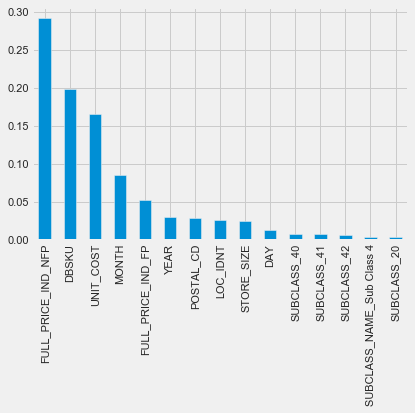

In [125]:
imp_feat.sort_values(ascending = False)[:15].plot(kind='bar')

In [126]:
# Let's PREDICT THE PRICE
PricePred = model_final.predict(X_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 330 out of 330 | elapsed:    1.8s finished


In [127]:
PricePred_df = pd.DataFrame(PricePred)
PricePred_df.head()

,0
0,36.421319
1,34.712388
2,39.498403
3,38.911634
4,53.602488


In [128]:
PricePred_df = PricePred_df.rename(columns={0:'Predicted_Price'})

In [129]:
PricePred_df.head()

,Predicted_Price
0,36.421319
1,34.712388
2,39.498403
3,38.911634
4,53.602488


In [130]:
PricePred_df.shape

(26413, 1)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 330 out of 330 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 330 out of 330 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 330 out of 330 | elapsed:    1.5s finished


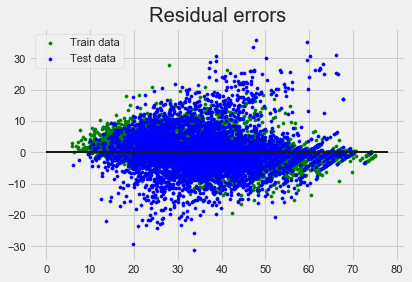

In [194]:
y_pred = model_final.predict(X_test)
# Plot for residual error for the RANDOM FOREST REGRESSOR Model
plt.style.use('fivethirtyeight')
# Plot residual errors in training data
plt.scatter(model_final.predict(X_train), model_final.predict(X_train) - y_train, color = "green",
           s = 10, label = 'Train data')
# Plot residual errors in test data
plt.scatter(y_pred,y_pred - y_test, color = "blue",
           s = 10, label = 'Test data')
## Plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 78, linewidth = 2)
## Plotting legend
plt.legend(loc ='upper left')
## Plot title
plt.title("Residual errors")
plt.show()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 330 out of 330 | elapsed:    0.5s finished


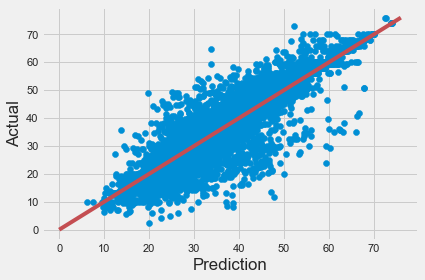

In [131]:
y_pred = model_final.predict(X_test)

# Build a plot 
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [132]:
from sklearn.metrics import mean_absolute_error
validation_predictions = model_final.predict(X_test)

validation_prediction_errors = mean_absolute_error(y_test, validation_predictions)

validation_prediction_errors

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 330 out of 330 | elapsed:    0.4s finished


4.043857218050528

In [133]:
from sklearn.metrics import mean_squared_log_error

print('MAE:\t$%.2f' % mean_absolute_error(y_test, y_pred))
print('MSLE:\t%.5f' % mean_squared_log_error(y_test, y_pred))

MAE:	$4.04
MSLE:	0.04101


# Optimal Price and Confidence Intervals

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

# Set lower and upper quantile
LOWER_ALPHA = 0.1
UPPER_ALPHA = 0.9

#Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",alpha=LOWER_ALPHA)

#The mid modelwill use the default loss
mid_model = GradientBoostingRegressor(loss="ls")

upper_model = GradientBoostingRegressor(loss="quantile",alpha=UPPER_ALPHA)

In [135]:
# Fit models
lower_model.fit(X_train, y_train)
mid_model.fit(X_train, y_train)
upper_model.fit(X_train, y_train)

# Record actual values on test set
predictions = pd.DataFrame(y_test)

#Predict
predictions['lower'] = lower_model.predict(X_test)
predictions['mid'] = mid_model.predict(X_test)
predictions['upper'] = upper_model.predict(X_test)

print(predictions)

         UNIT_PRICE      lower        mid      upper
8070497       31.36  20.770770  36.915526  43.744457
2338770       18.62  14.822289  27.281679  43.373915
2129208       44.80  23.048162  42.474627  53.860184
4004185       21.00  19.838728  28.602717  39.358592
8182937       54.35  20.863218  38.490079  50.893279
...             ...        ...        ...        ...
7950230       76.00  58.569038  65.700326  70.228634
49377         11.52  16.076383  29.965231  46.597373
2281404       30.80  21.205157  30.207343  37.734566
1067750       21.00  19.609851  28.642351  37.926679
685097        30.00  29.913078  30.767914  34.821279

[6604 rows x 4 columns]


In [136]:
from scipy.stats import norm
import numpy as np

In [137]:
norm.ppf(0.975) # 95% of confidence level

1.959963984540054

In [138]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math


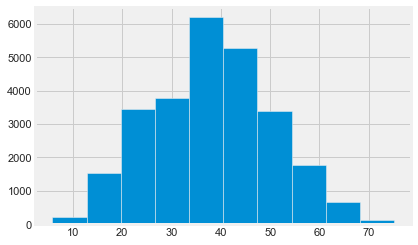

In [139]:
plt.hist(PricePred)
plt.show()

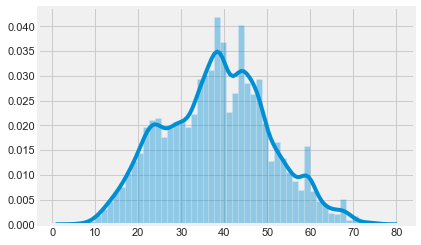

In [140]:
sns.distplot(PricePred)

In [141]:
n = len(PricePred_df)

con_coef = .95

# The alpha level
alpha = 1. - con_coef

In [142]:
x_bar = PricePred_df.mean()
x_bar

Predicted_Price    38.284827
dtype: float64

In [143]:
sigma = PricePred_df.std()
sigma

Predicted_Price    12.194137
dtype: float64

In [144]:
import scipy.stats as stats

z_critical = stats.norm.ppf(q = 0.975)
z_critical

1.959963984540054

In [145]:
zinterval = stats.norm.interval(alpha=con_coef)
zinterval

(-1.959963984540054, 1.959963984540054)

In [146]:
# Standard Error needed to calculate the bounds
standard_error = sigma / math.sqrt(n)
standard_error

Predicted_Price    0.075031
dtype: float64

In [147]:
CI_lower = x_bar - z_critical * standard_error
CI_upper = x_bar + z_critical * standard_error

In [148]:
# This would be the the optimal average price lies, feeding our formula with the standard_error
CI_lower, CI_upper

(Predicted_Price    38.137769
 dtype: float64, Predicted_Price    38.431886
 dtype: float64)

In [149]:
# TAKING SAMPLE to cross validate our optimal price level of confidence
n_sample = 10000
Price_sample = PricePred_df.ix[np.random.choice(PricePred_df.index, n)]
Price_sample.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Predicted_Price
2605,40.967729
24133,24.193187
20680,37.329838
595,51.311299
3177,15.155890


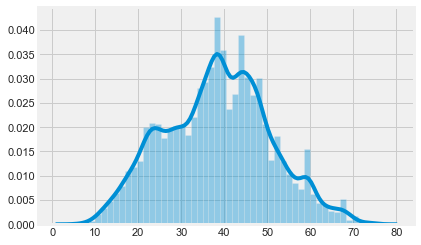

In [150]:
## We can see the distribution is almost the same as the NOT sampled PredPrice variable

import seaborn as sns

sns.distplot(Price_sample)

In [151]:
# Let's again calculate what is necessary to obtain our range...
# The range obtained by our sample is incredibly similar to that of the population.

xbar_sample = Price_sample.mean()
xbar_sample

sigma_sample = Price_sample.std()
sigma_sample

SE_sample = sigma_sample / math.sqrt(n_sample)
SE_sample

CI_lower_sample = xbar_sample - z_critical * SE_sample
CI_upper_sample = xbar_sample + z_critical * SE_sample

CI_lower_sample, CI_upper_sample

(Predicted_Price    38.157116
 dtype: float64, Predicted_Price    38.636205
 dtype: float64)

In [152]:
# ONCE we made sure that our results are CI are crossvalidated
# we moved on to get the CI at a level of conf of 95% for our predicted prices grouped by SUBCLASS
# using the error provided by our RANDOM Forest' model

In [153]:
# Applying the MAE deriving from our RANDOM FOREST model (instead of the standard_error)
model_error = 4.0540

In [154]:
CI_lower_mod = x_bar - z_critical * model_error
CI_upper_mod = x_bar + z_critical * model_error

In [155]:
# This is the interval where the optimal average price lies. (with a level of conf of 95%)
CI_lower_mod, CI_upper_mod

(Predicted_Price    30.339133
 dtype: float64, Predicted_Price    46.230521
 dtype: float64)

In [156]:
# Let's calculate the CI for the whole list of predicted prices generated (level of conf 95%)
CI_lower_mod1 = PricePred - z_critical * model_error
CI_upper_mod1 = PricePred + z_critical * model_error

In [157]:
# This is the interval where the optimal prices lie. (with a level of conf of 95%)
CI_lower_mod1, CI_upper_mod1

(array([28.4756251 , 26.76669396, 31.55270895, ..., 24.46830051,
        37.92578725, 20.96119468]),
 array([44.36701309, 42.65808194, 47.44409694, ..., 40.3596885 ,
        53.81717523, 36.85258267]))

In [158]:
# Converting lower and upper CI to a DF will help us building a final chart to represent the optimal PRICES
CI_lower_mod_df = pd.DataFrame(CI_lower_mod1)
CI_lower_mod_df = CI_lower_mod_df.rename(columns={0:'Lower CI'})
CI_lower_mod_df.head()

,Lower CI
0,28.475625
1,26.766694
2,31.552709
3,30.965940
4,45.656794


In [159]:
CI_upper_mod_df = pd.DataFrame(CI_upper_mod1)
CI_upper_mod_df = CI_upper_mod_df.rename(columns={0:'Upper CI'})
CI_upper_mod_df.head()

,Upper CI
0,44.367013
1,42.658082
2,47.444097
3,46.857328
4,61.548182


In [160]:
Unit_Price_df =pd.DataFrame(y_train)
Unit_Price_df = Unit_Price_df.rename(columns={'UNIT_PRICE':'Actual Price'})
Unit_Price_df.head()

,Actual Price
616830,36.00
8178533,33.60
466550,42.78
8621450,39.50
5868536,54.00


In [161]:
Unit_Price_df.reset_index(inplace=True)

In [162]:
Unit_Price_df = Unit_Price_df.rename(columns={'index':'Index'})

In [163]:
Unit_Price_df.head()

,Index,Actual Price
0,616830,36.00
1,8178533,33.60
2,466550,42.78
3,8621450,39.50
4,5868536,54.00


In [164]:
# After few DF conversion
## let's create an object that concatenates the random index of split of our dataset, 
# the actual price, and the predicted price with its lowwe and upper CI (conf 95%)
Intervals = pd.concat([Unit_Price_df, PricePred_df, CI_lower_mod_df, CI_upper_mod_df],axis=1,sort=False)
         

In [165]:
Intervals.head()

,Index,Actual Price,Predicted_Price,Lower CI,Upper CI
0,616830,36.00,36.421319,28.475625,44.367013
1,8178533,33.60,34.712388,26.766694,42.658082
2,466550,42.78,39.498403,31.552709,47.444097
3,8621450,39.50,38.911634,30.965940,46.857328
4,5868536,54.00,53.602488,45.656794,61.548182


In [166]:
# Let's get back to our train2 dataset where a copy of our split dataset without dummification is present
# Let's start some DF conversion and 'cleaning' 

In [167]:
# A copy of my original split dataset, only without dummies!
X_train2.head()

,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,DEPARTMENT,SUBCLASS,SUBCLASS_NAME,STORE_TYPE,POSTAL_CD,STORE_SIZE,DAY,MONTH,YEAR,UNIT_COST
616830,494,472522.0,0.0,NFP,10,41,Sub Class 2,Outlet Mall,2747,4205.0,5,10,2015,18.50
8178533,234,600882.0,0.0,NFP,10,21,Sub Class 2,Power Strip,30106,4345.0,2,3,2017,13.40
466550,573,539015.0,0.0,NFP,10,20,Sub Class 4,Strip Store,11520,3380.0,6,6,2016,18.00
8621450,529,533539.0,0.0,NFP,10,31,Sub Class 2,Power Strip,46383,3412.0,1,4,2016,14.85
5868536,1159,2109512.0,0.0,FP,12,40,Sub Class 4,Regional Mall,44070,3779.0,3,10,2015,18.50


In [168]:
# SUBCLASS
Subclass_df = pd.DataFrame(X_train2['SUBCLASS'])
Subclass_df.shape
Subclass_df.head()

,SUBCLASS
616830,41
8178533,21
466550,20
8621450,31
5868536,40


In [169]:
## Re-INDEXING
Subclass_df.reset_index(inplace=True)
Subclass_df = Subclass_df.rename(columns={'index':'Index'})
Subclass_df.head()

,Index,SUBCLASS
0,616830,41
1,8178533,21
2,466550,20
3,8621450,31
4,5868536,40


In [170]:
# SUBCLASS_NAME
Subclass_n_df = pd.DataFrame(X_train2['SUBCLASS_NAME'])
Subclass_n_df.shape
Subclass_n_df.head()

,SUBCLASS_NAME
616830,Sub Class 2
8178533,Sub Class 2
466550,Sub Class 4
8621450,Sub Class 2
5868536,Sub Class 4


In [171]:
# Re-INDEXING
Subclass_n_df.reset_index(inplace=True)
Subclass_n_df = Subclass_n_df.rename(columns={'index':'Index1'})
Subclass_n_df.head()

,Index1,SUBCLASS_NAME
0,616830,Sub Class 2
1,8178533,Sub Class 2
2,466550,Sub Class 4
3,8621450,Sub Class 2
4,5868536,Sub Class 4


In [172]:
# Subclasses = Subclass df concatenated to Subclass_name df

In [173]:
Subclasses = pd.concat([Subclass_df,Subclass_n_df],axis=1,sort=False)

In [174]:
Subclasses.head()

,Index,SUBCLASS,Index1,SUBCLASS_NAME
0,616830,41,616830,Sub Class 2
1,8178533,21,8178533,Sub Class 2
2,466550,20,466550,Sub Class 4
3,8621450,31,8621450,Sub Class 2
4,5868536,40,5868536,Sub Class 4


In [175]:
Subclasses = Subclasses.drop(["Index"],axis=1)

In [176]:
# Our chart showing pred prices with CI and related SUBCLASS
CI_subclass = pd.concat([Intervals,Subclasses],axis=1,sort=False)

In [177]:
CI_subclass = CI_subclass[["Index", "SUBCLASS", "SUBCLASS_NAME", "Actual Price", "Predicted_Price",
                           "Lower CI", "Upper CI"]]

In [178]:
CI_subclass.head()

,Index,SUBCLASS,SUBCLASS_NAME,Actual Price,Predicted_Price,Lower CI,Upper CI
0,616830,41,Sub Class 2,36.00,36.421319,28.475625,44.367013
1,8178533,21,Sub Class 2,33.60,34.712388,26.766694,42.658082
2,466550,20,Sub Class 4,42.78,39.498403,31.552709,47.444097
3,8621450,31,Sub Class 2,39.50,38.911634,30.965940,46.857328
4,5868536,40,Sub Class 4,54.00,53.602488,45.656794,61.548182


In [179]:
# Calculate the optimal average price and its CI (conf=95%) per each subclass

In [180]:
# Let's use groupby and aggregate function to check the mean Predicted Price per SUBCLASS_NAME
Subclass_Predicted = CI_subclass.groupby(['SUBCLASS_NAME']).agg({'Predicted_Price': ['mean','median','min', 'max','count']})
print(Subclass_Predicted)

              Predicted_Price                                        
                         mean     median        min        max  count
SUBCLASS_NAME                                                        
Sub Class 1         41.256353  41.708693   8.764416  75.119227   3487
Sub Class 2         37.495549  38.210553   5.909506  73.594056   6815
Sub Class 3         35.297244  36.309508   8.314859  64.096223   2051
Sub Class 4         38.938613  38.915250   6.677076  74.630069  12836
Sub Class 5         28.597024  30.012121  11.094582  42.611436    415
Sub Class 6         34.350511  35.898228   5.855392  46.061205    806
Sub Class 7         19.707178  22.924619  11.439001  24.757915      3


In [181]:
# Let's use groupby and aggregate function to check the mean Actual Price per SUBCLASS_NAME
Subclass_Actual = CI_subclass.groupby(['SUBCLASS_NAME']).agg({'Actual Price': ['mean','median','min', 'max','count']})
print(Subclass_Actual)

              Actual Price                           
                      mean median   min    max  count
SUBCLASS_NAME                                        
Sub Class 1      41.364032  43.20  0.01  76.00   3487
Sub Class 2      37.544437  39.00  0.01  76.00   6815
Sub Class 3      35.181468  37.09  3.84  64.00   2051
Sub Class 4      38.963842  39.50  2.09  76.00  12836
Sub Class 5      28.366458  30.00  6.80  45.00    415
Sub Class 6      34.275403  37.53  2.94  47.92    806
Sub Class 7      14.136667  14.42  4.99  23.00      3


In [182]:
# Subclass X_bars (MEAN)
xbar_SUB1 = 41.256353
xbar_SUB2 = 37.495549
xbar_SUB3 = 35.297244
xbar_SUB4 = 38.938613
xbar_SUB5 = 28.597024
xbar_SUB6 = 34.350511
xbar_SUB7 = 19.707178

In [183]:
# Let's calculate the lower and upper level at a Confidence interval of 95% for each SUBCLASS
CI_lower_SUB_1 = xbar_SUB1 - z_critical * model_error
CI_upper_SUB_1 = xbar_SUB1 + z_critical * model_error

CI_lower_SUB_2 = xbar_SUB2 - z_critical * model_error
CI_upper_SUB_2 = xbar_SUB2 + z_critical * model_error

CI_lower_SUB_3 = xbar_SUB3 - z_critical * model_error
CI_upper_SUB_3 = xbar_SUB3 + z_critical * model_error

CI_lower_SUB_4 = xbar_SUB4 - z_critical * model_error
CI_upper_SUB_4 = xbar_SUB4 + z_critical * model_error

CI_lower_SUB_5 = xbar_SUB5 - z_critical * model_error
CI_upper_SUB_5 = xbar_SUB5 + z_critical * model_error

CI_lower_SUB_6 = xbar_SUB6 - z_critical * model_error
CI_upper_SUB_6 = xbar_SUB6 + z_critical * model_error

CI_lower_SUB_7 = xbar_SUB7 - z_critical * model_error
CI_upper_SUB_7 = xbar_SUB7 + z_critical * model_error

In [184]:
print('CI for Predicted Prices of SUBCLASS 1 ')
print(CI_lower_SUB_1, '|', CI_upper_SUB_1)
print('======================================')
print('CI for Predicted Prices of SUBCLASS 2 ')
print(CI_lower_SUB_2, '|', CI_upper_SUB_2)
print('======================================')
print('CI for Predicted Prices of SUBCLASS 3 ')
print(CI_lower_SUB_3, '|', CI_upper_SUB_3)
print('======================================')
print('CI for Predicted Prices of SUBCLASS 4 ')
print(CI_lower_SUB_4, '|', CI_upper_SUB_4)
print('======================================')
print('CI for Predicted Prices of SUBCLASS 5 ')
print(CI_lower_SUB_5, '|', CI_upper_SUB_5)
print('======================================')
print('CI for Predicted Prices of SUBCLASS 6 ')
print(CI_lower_SUB_6, '|', CI_upper_SUB_6)
print('======================================')
print('CI for Predicted Prices of SUBCLASS 7 ')
print(CI_lower_SUB_7, '|', CI_upper_SUB_7)

CI for Predicted Prices of SUBCLASS 1 
33.31065900667462 | 49.202046993325375
CI for Predicted Prices of SUBCLASS 2 
29.54985500667462 | 45.441242993325375
CI for Predicted Prices of SUBCLASS 3 
27.35155000667462 | 43.24293799332538
CI for Predicted Prices of SUBCLASS 4 
30.99291900667462 | 46.884306993325374
CI for Predicted Prices of SUBCLASS 5 
20.65133000667462 | 36.54271799332538
CI for Predicted Prices of SUBCLASS 6 
26.40481700667462 | 42.296204993325375
CI for Predicted Prices of SUBCLASS 7 
11.76148400667462 | 27.652871993325377


In [185]:
# Let's create the DF with all the data gathered above to better showcase our results indexed by 
# SUBCLASS

In [186]:
CI_subclass_avg = {'Actual_Price_avg' : [41.364032,37.544437,35.181468,38.963842,
                                        28.366458,34.275403,14.136667], 
                   'Predicted_Price_avg' : [41.256353,37.495549,35.297244,38.938613,
                                           28.597024,34.350511,19.707178],
                   'Lower CI': [33.310659,29.549855,27.351550,30.992919,
                               20.651330,26.404817,11.761484],
                  'Upper CI' : [49.202046,45.441242,43.242937,46.884306,
                               36.542717,42.296204,27.652871]}

CI_subclass_avg_df = pd.DataFrame(CI_subclass_avg, columns = ['Actual_Price_avg',
                                                             'Predicted_Price_avg', 'Lower CI',
                                                             'Upper CI'], index=['SUBCLASS_1',
                                                                                'SUBCLASS_2',
                                                                                'SUBCLASS_3',
                                                                                'SUBCLASS_4',
                                                                                'SUBCLASS_5',
                                                                                'SUBCLASS_6',
                                                                                'SUBCLASS_7'])

In [187]:
CI_subclass_avg_df

,Actual_Price_avg,Predicted_Price_avg,Lower CI,Upper CI
SUBCLASS_1,41.364032,41.256353,33.310659,49.202046
SUBCLASS_2,37.544437,37.495549,29.549855,45.441242
SUBCLASS_3,35.181468,35.297244,27.351550,43.242937
SUBCLASS_4,38.963842,38.938613,30.992919,46.884306
SUBCLASS_5,28.366458,28.597024,20.651330,36.542717
SUBCLASS_6,34.275403,34.350511,26.404817,42.296204
SUBCLASS_7,14.136667,19.707178,11.761484,27.652871
